#                               Temperature Forecast Project using ML
##### Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].

- 1. station - used weather station number: 1 to 25
- 2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
- 3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
- 4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
- 5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
- 6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
- 7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
- 8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
- 9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
- 10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
- 11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
- 12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
- 13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
- 14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
- 15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
- 16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
- 17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
- 18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
- 19. lat - Latitude (Â°): 37.456 to 37.645
- 20. lon - Longitude (Â°): 126.826 to 127.135
- 21. DEM - Elevation (m): 12.4 to 212.3
- 22. Slope - Slope (Â°): 0.1 to 5.2
- 23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
- 24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
- 25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

##### Note -You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [1]:
import pandas as pd # For Data  Wrangling Purpose
import numpy as np  # For Basic Computation Libraries
import seaborn as sns # For Visualization Techniques
import matplotlib.pyplot as plt #Ploting Graphes
import warnings               # Filter Warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Temperature Forecast DataSet Using Pandas
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

#### Comment :
- All variable are Numerical in nature.
- Next_Tmax and Next_Tmin are Target Variable.
- This dataset contain 7752 Rows and 25 Columns.

# Statistical Analysis

In [3]:
df.duplicated().sum()

0

In [4]:
df.isin([' ','NA','-']).sum().any()

False

#### Comment:
1. No Duplicate entry in dataset.
2. No whitespace, NA, '-' exist in dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
Mis_val = df.isnull().sum().sort_values(ascending =False)
percentage =(Mis_val/len(df)*100)
Missing_Values_info = pd.DataFrame({"Missing Values": Mis_val,"% OF Missing Data":percentage})

In [7]:
Missing_Values_info

Missing Values  % OF Missing Data
LDAPS_CC3                     75           0.967492
LDAPS_PPT4                    75           0.967492
LDAPS_PPT2                    75           0.967492
LDAPS_PPT1                    75           0.967492
LDAPS_CC4                     75           0.967492
LDAPS_CC2                     75           0.967492
LDAPS_CC1                     75           0.967492
LDAPS_LH                      75           0.967492
LDAPS_WS                      75           0.967492
LDAPS_Tmin_lapse              75           0.967492
LDAPS_Tmax_lapse              75           0.967492
LDAPS_RHmax                   75           0.967492
LDAPS_RHmin                   75           0.967492
LDAPS_PPT3                    75           0.967492
Present_Tmin                  70           0.902993
Present_Tmax                  70           0.902993
Next_Tmax                     27           0.348297
Next_Tmin                     27           0.348297
Date                           2           0.025800
station                        2           0.025800
lat                            0           0.000000
lon                            0           0.000000
DEM                            0           0.000000
Slope                          0           0.000000
Solar radiation                0           0.000000

- <b> Missing Values Are Less Than 1%. So We Can Drop These Missing Values.</b>

In [8]:
print("We Had {} Rows And {} Columns Before Dropping NaN Values.".format(df.shape[0],df.shape[1]))
df.dropna(inplace = True)
print("We Have {} Rows And {} Columns Before Dropping NaN Values.".format(df.shape[0],df.shape[1]))


We Had 7752 Rows And 25 Columns Before Dropping NaN Values.
We Have 7588 Rows And 25 Columns Before Dropping NaN Values.


-<b> Now. There Is No Missing Values Present.</b>

In [9]:
# df['Date'] =pd.to_datetime(df['Date'])
# df['Day'] = df['Date'].apply(lambda x:x.day)
# df['Month'] = df['Date'].apply(lambda x:x.Month)
# df['Year'] = df['Date'].apply(lambda x:x.Year)
# df.head()

In [10]:
print(df['Date'].value_counts())

Date
30-06-2013    25
23-07-2016    25
22-08-2015    25
23-08-2015    25
24-08-2015    25
              ..
13-08-2015    22
24-07-2015    22
06-07-2017    22
23-08-2017    22
30-06-2017    16
Name: count, Length: 307, dtype: int64


In [11]:
#Spliting  Date Columns Into  Three Parts   Day Month Year
df[['Date','Month','Year']] = df['Date'].str.split("-",expand = True)


In [12]:
# Changing Datatype  OF These 3 Columns
df[["Date","Month","Year"]] =df[['Date',"Month","Year"]].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   int32  
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64
 17  

In [14]:
for i in df.columns:
    print(df[i].value_counts())

station
25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: count, dtype: int64
Date
30    366
27    250
19    250
1     249
21    249
8     249
17    249
16    249
29    248
28    248
22    248
15    248
4     248
7     248
12    247
14    247
9     247
3     247
26    247
11    246
2     246
18    246
5     246
13    245
23    245
24    245
25    245
6     244
20    225
10    222
31     99
Name: count, dtype: int64
Present_Tmax
31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 167, dtype: int64
Present_Tmin
24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0    

In [15]:
df.describe()

station         Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
count  7588.000000  7588.000000   7588.000000   7588.000000  7588.000000   
mean     13.014101    15.939510     29.748366     23.195809    56.724969   
std       7.217858     8.906521      2.967401      2.400880    14.626559   
min       1.000000     1.000000     20.000000     11.300000    19.794666   
25%       7.000000     8.000000     27.800000     21.600000    45.960243   
50%      13.000000    16.000000     29.900000     23.400000    55.023199   
75%      19.000000    24.000000     32.000000     24.800000    67.115099   
max      25.000000    31.000000     37.600000     29.900000    98.524734   

       LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS  \
count  7588.000000       7588.000000       7588.000000  7588.000000   
mean     88.360823         29.620128         23.511786     7.094097   
std       7.199456          2.943496          2.342579     2.177034   
min      58.936283         17.624954         14.272646     2.882580   
25%      84.203724         27.673756         22.086820     5.675358   
50%      89.784122         29.709537         23.758249     6.547838   
75%      93.742725         31.711109         25.155660     8.028960   
max     100.000153         38.542255         29.619342    21.857621   

          LDAPS_LH  ...   LDAPS_PPT4          lat         lon          DEM  \
count  7588.000000  ...  7588.000000  7588.000000  7588.00000  7588.000000   
mean     62.492606  ...     0.265373    37.544792   126.99142    61.918136   
std      33.686158  ...     1.179661     0.050428     0.07922    54.323529   
min     -13.603212  ...     0.000000    37.456200   126.82600    12.370000   
25%      37.206201  ...     0.000000    37.510200   126.93700    28.700000   
50%      56.898324  ...     0.000000    37.550700   126.99500    45.716000   
75%      84.235666  ...     0.000017    37.577600   127.04200    59.832400   
max     213.414006  ...    16.655469    37.645000   127.13500   212.335000   

             Slope  Solar radiation    Next_Tmax    Next_Tmin        Month  \
count  7588.000000      7588.000000  7588.000000  7588.000000  7588.000000   
mean      1.259755      5343.724208    30.241526    22.910820     7.465999   
std       1.372748       429.782561     3.111807     2.482256     0.528635   
min       0.098500      4329.520508    17.400000    11.300000     6.000000   
25%       0.271300      5001.485717    28.200000    21.300000     7.000000   
50%       0.618000      5441.987305    30.400000    23.100000     7.000000   
75%       1.767800      5729.485840    32.600000    24.600000     8.000000   
max       5.178200      5992.895996    38.900000    29.800000     8.000000   

              Year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

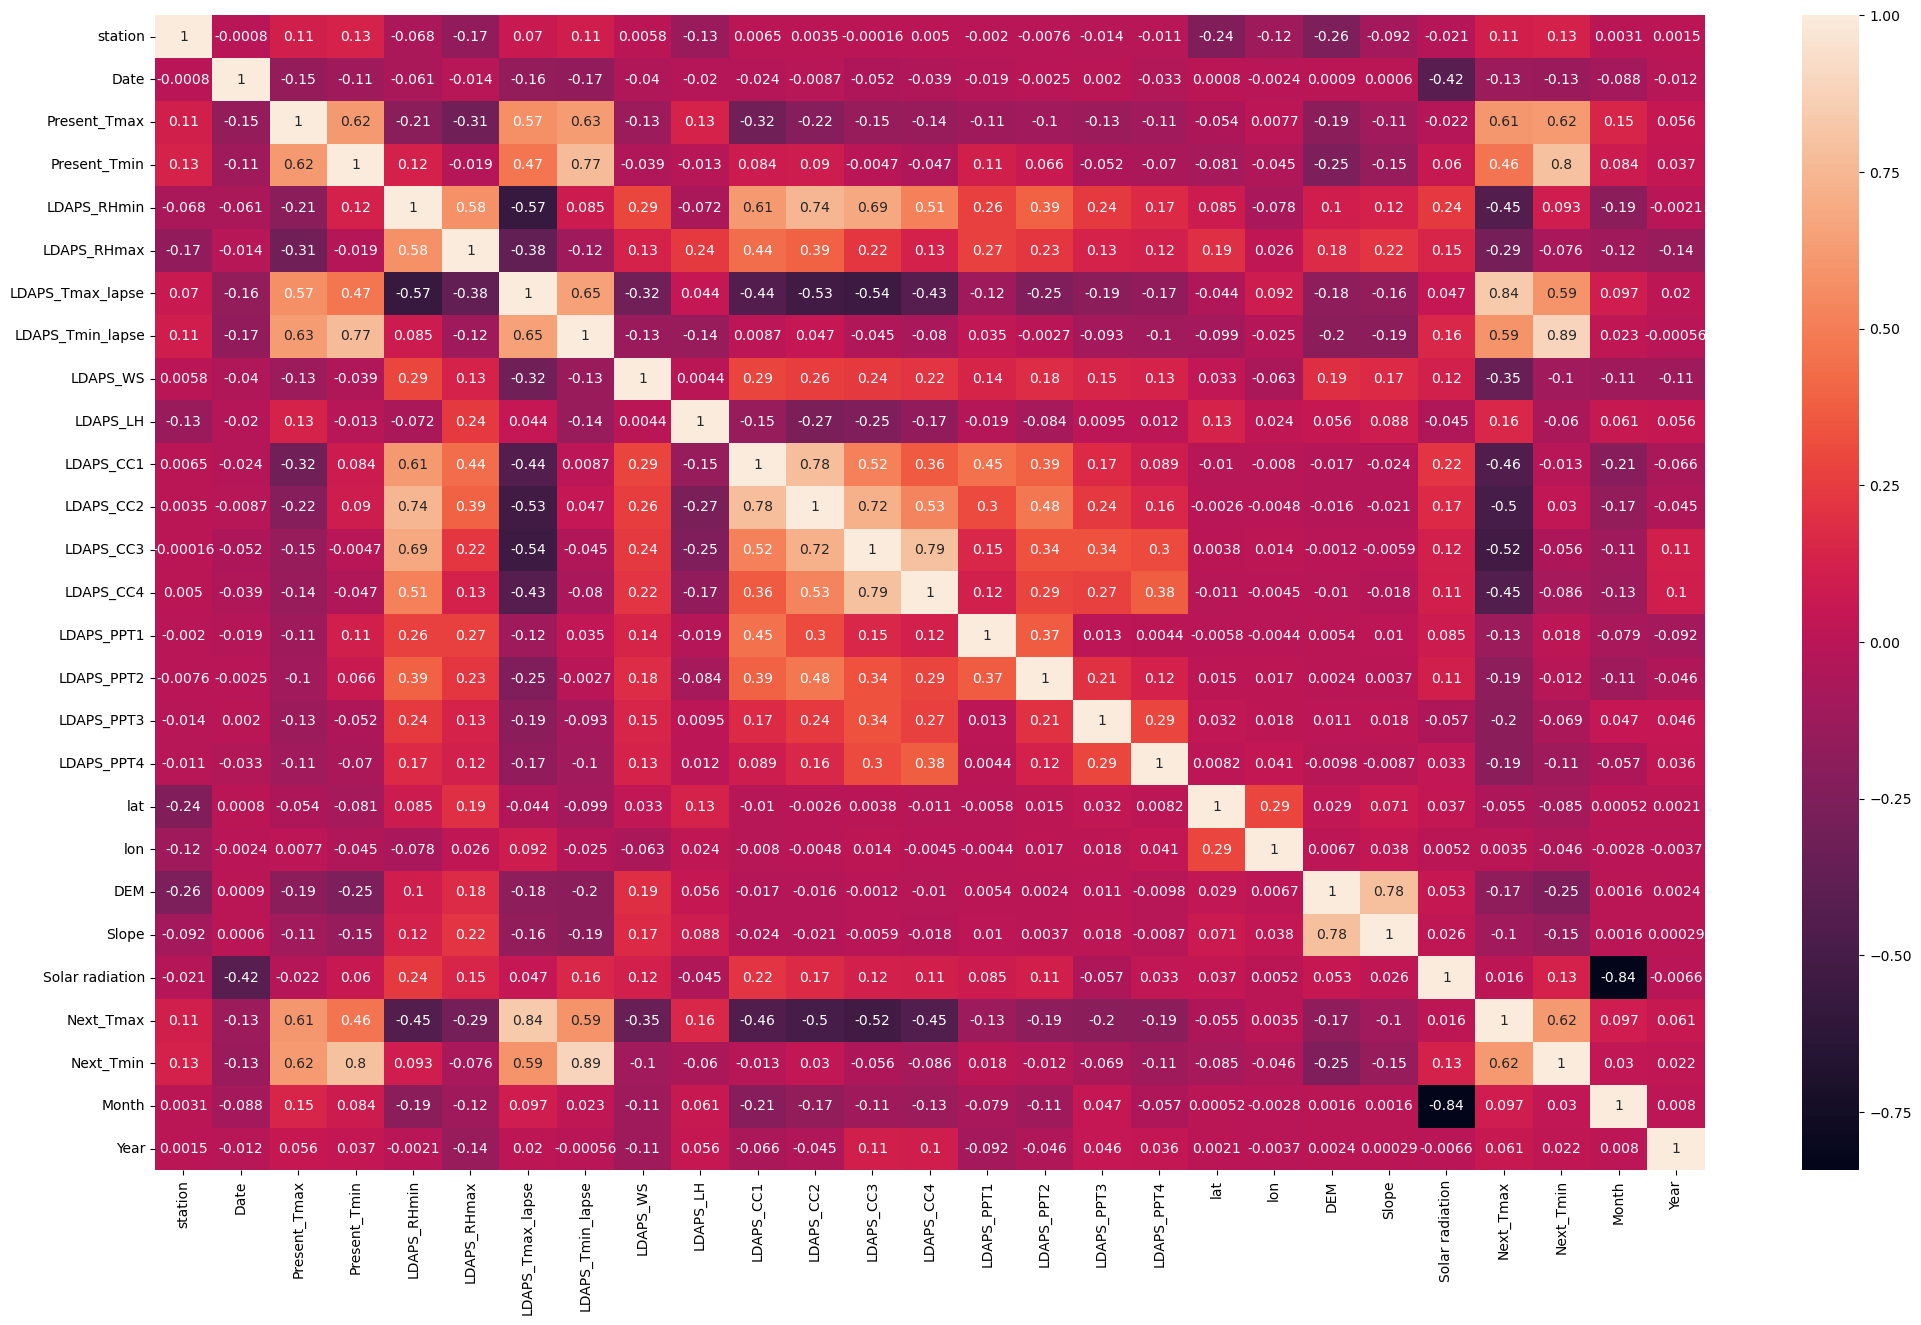

In [16]:
#Checking relationship Between Feature To Outcom And Feature To Feature
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,annot = True , annot_kws ={"size": 10})
plt.show()

- We can see here Present_Tmax and Present_Tmin are highly correlated with Target variables, LDAPS_RHmin and LDAPS_RHmax are also highly correlated with target variables, Next_Tmin and Next_Tmax are also highly correlated with exch other, most of the columns are negatively correlated with target variables.

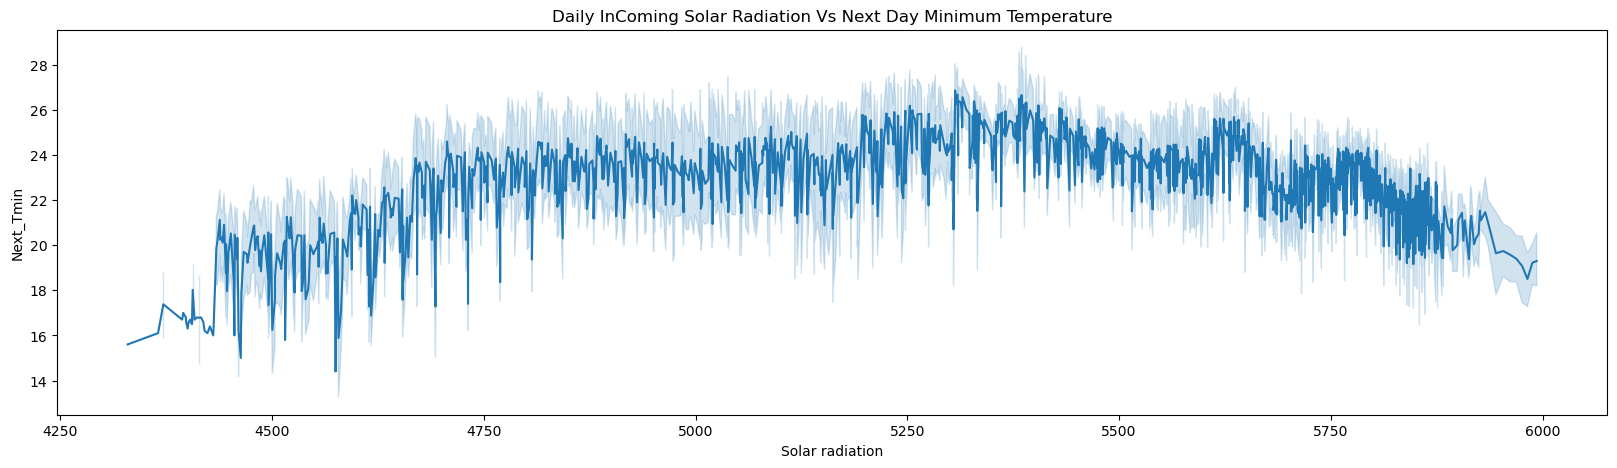

In [17]:
plt.figure(figsize = (20,5))
plt.title("Daily InComing Solar Radiation Vs Next Day Minimum Temperature")
sns.lineplot(x="Solar radiation",y ="Next_Tmin",data =df)
plt.show()

- <b>Here, We Can See That, The Next Day Minimum Temparature Is Frequently Increases </b>

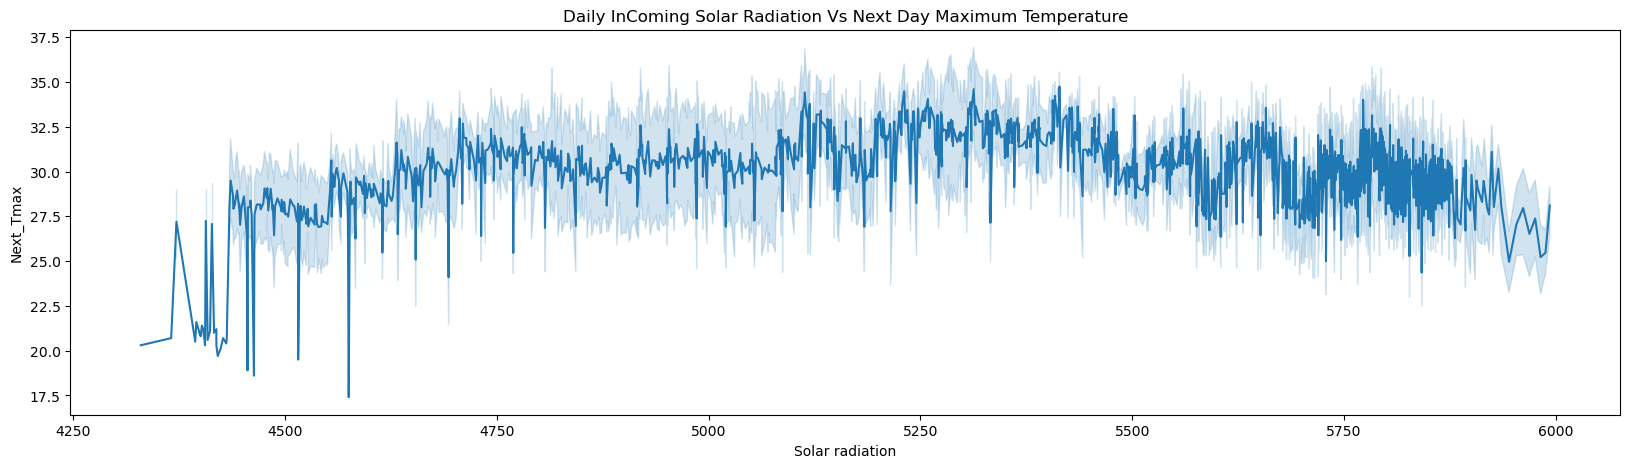

In [19]:
plt.figure(figsize = (20,5))
plt.title("Daily InComing Solar Radiation Vs Next Day Maximum Temperature")
sns.lineplot(x="Solar radiation",y ="Next_Tmax",data =df)
plt.show()

- <b> Here, We Can See That, The Next Day Maximum Temparature Is Frequently Increases.</b>

<Axes: title={'center': 'Weather Station Vs Next Day Minimum Temperature'}, xlabel='station', ylabel='Next_Tmin'>

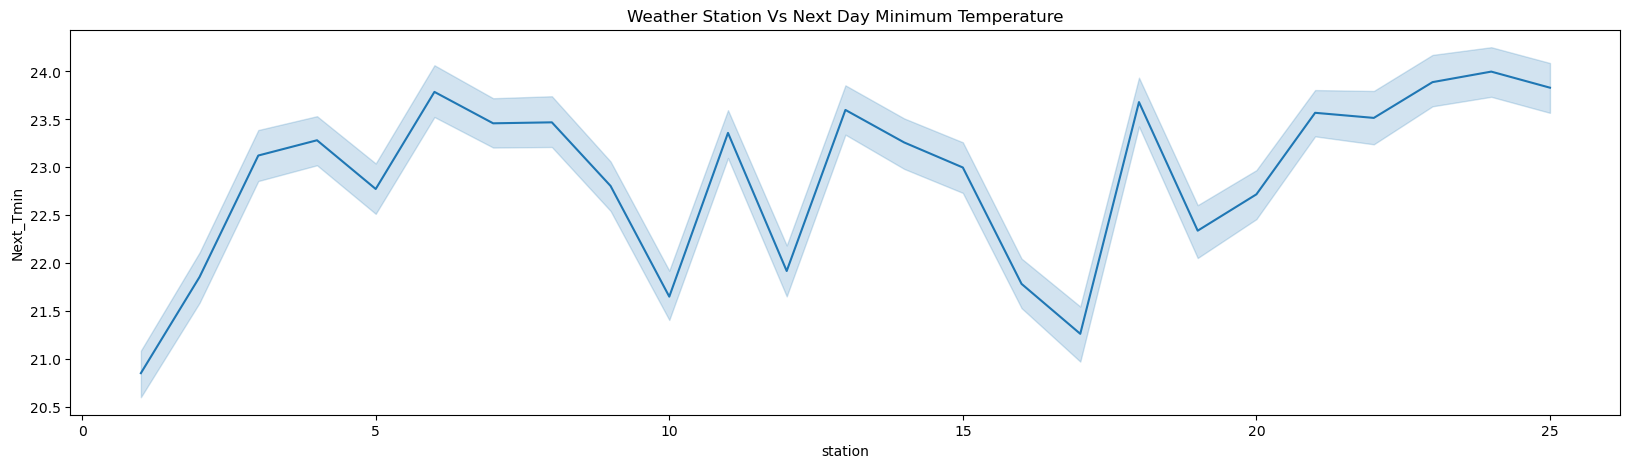

In [20]:
plt.figure(figsize =(20,5))
plt.title("Weather Station Vs Next Day Minimum Temperature")
sns.lineplot(x='station',y='Next_Tmin',data =df)

- <b>  Here, We Can See That,The Line Plot Clears That Next Day Minimum Temparature Is High & Low At Station 18 & 17 Respectively</b>

<Axes: title={'center': 'Weather Station Vs Next Day Maximum Temperature'}, xlabel='station', ylabel='Next_Tmax'>

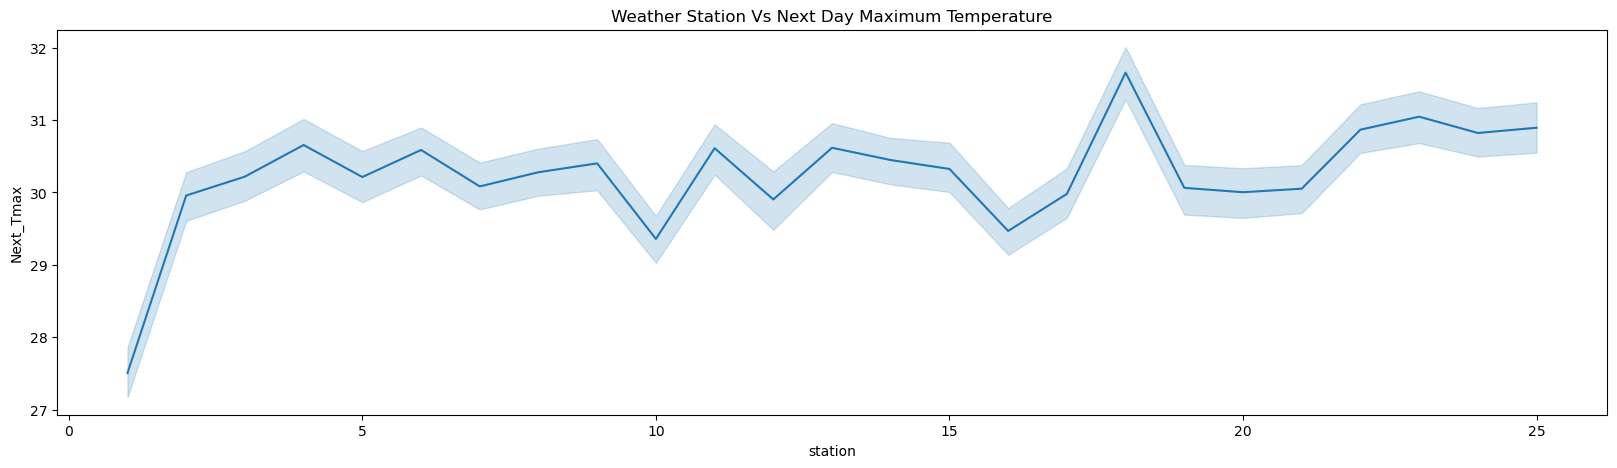

In [21]:
plt.figure(figsize =(20,5))
plt.title("Weather Station Vs Next Day Maximum Temperature")
sns.lineplot(x='station',y='Next_Tmax',data =df)

- <b> Here, We Can See That,The Line Plot Clears That Next Day Maximum Temparature Is High & Low At Station 18 & 10 Respectively.</b>

In [22]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Month',
       'Year'],
      dtype='object')

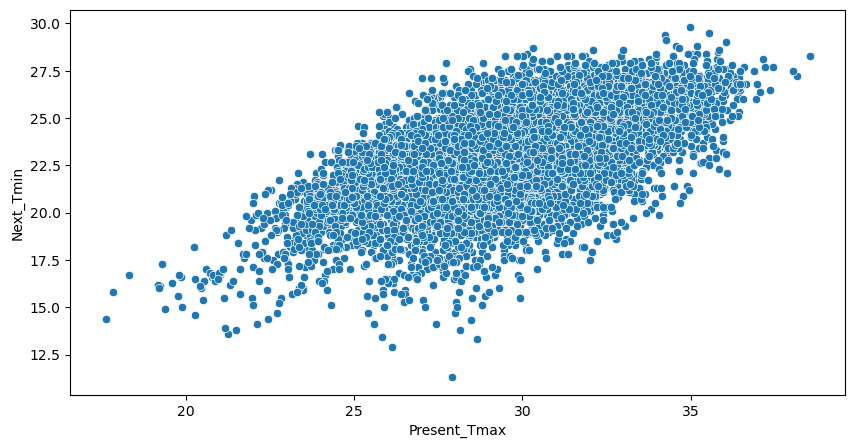

In [23]:
plt.figure(figsize =(10,5))
sns.scatterplot(x = df['LDAPS_Tmax_lapse'], y=df['Next_Tmin'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmin')
plt.show()

- <b>As We Can See That,With LDAPS_Tmax_lapse Temp Is Also Getting Higher</b>

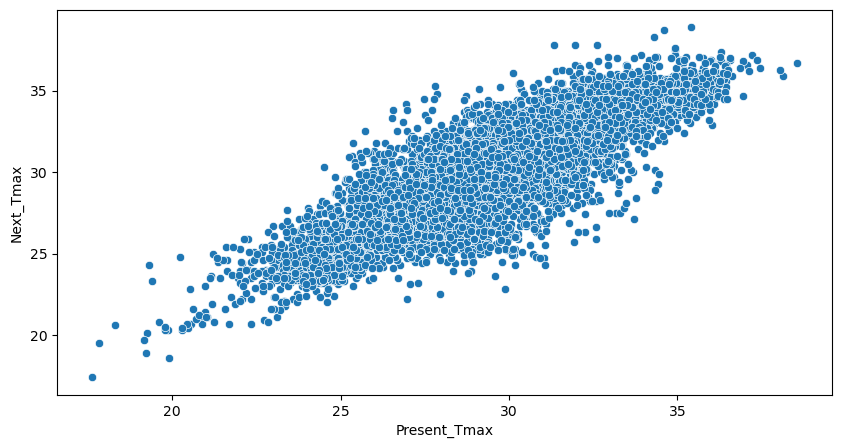

In [24]:
plt.figure(figsize =(10,5))
sns.scatterplot(x = df['LDAPS_Tmax_lapse'], y=df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')
plt.show()

- <b> We Can See Here With LDAPS_Tmin_lapse Temp Is Also Getting Lower. </b>

Text(0, 0.5, 'Next_Tmin')

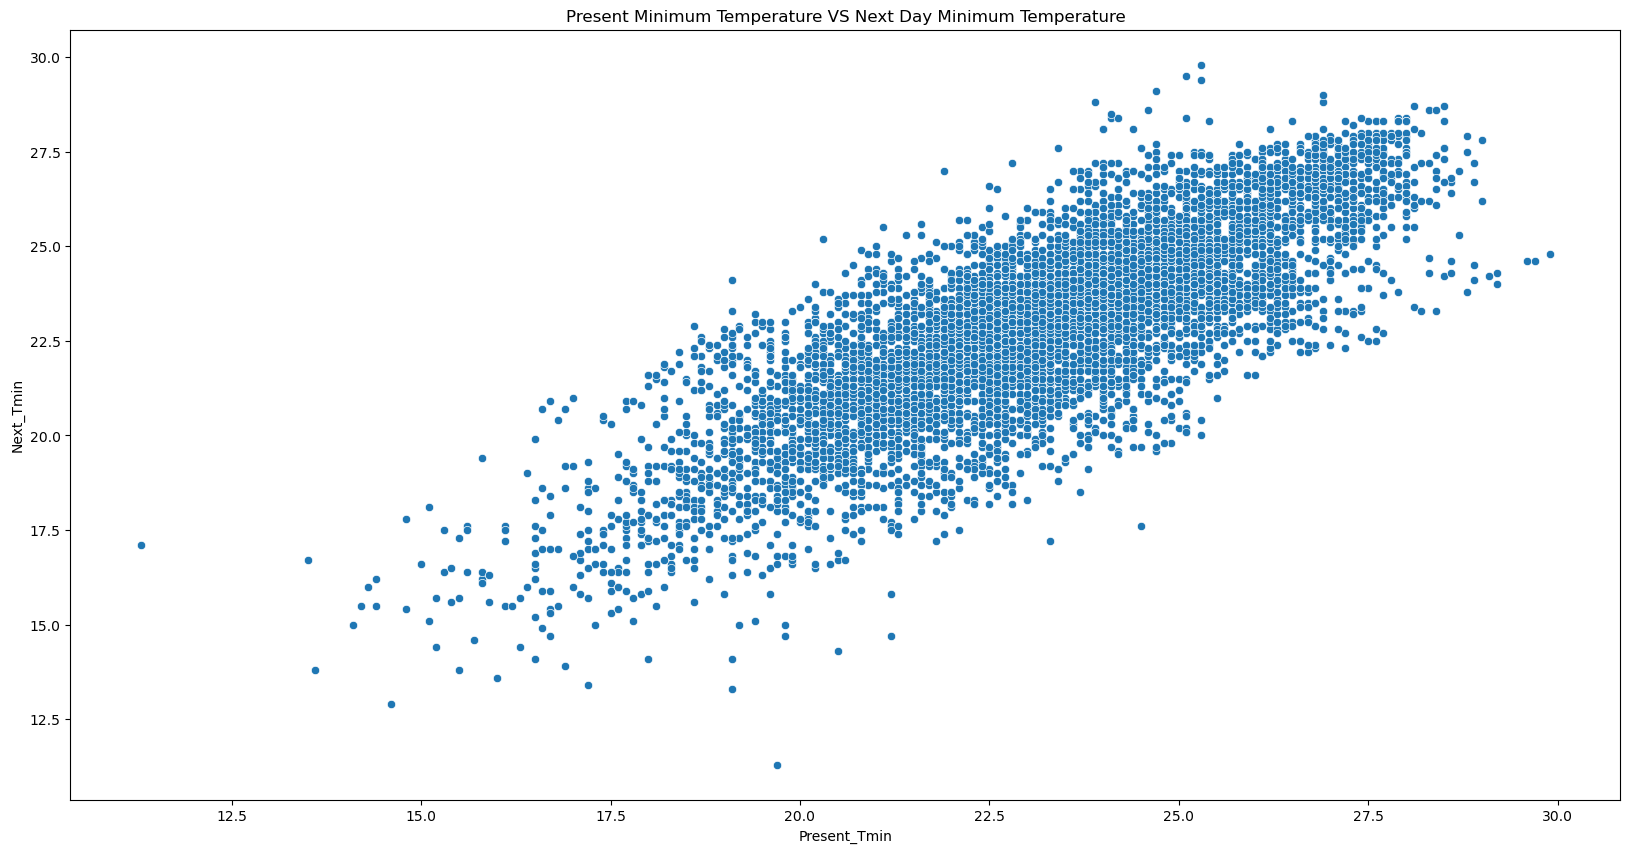

In [25]:
# Scatterplot Display Distribution Of Data Across Present Minimum Temperature VS Next day Minimum Temperature.
plt.figure(figsize=(20,10))
plt.title('Present Minimum Temperature VS Next Day Minimum Temperature')
sns.scatterplot(x= df['Present_Tmin'], y = df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

- <b>Here We Can Notice When Present_Tmin In Decreasing , Next_Tmin Also Getting Lower</b>

Text(0, 0.5, 'Next_Tmax')

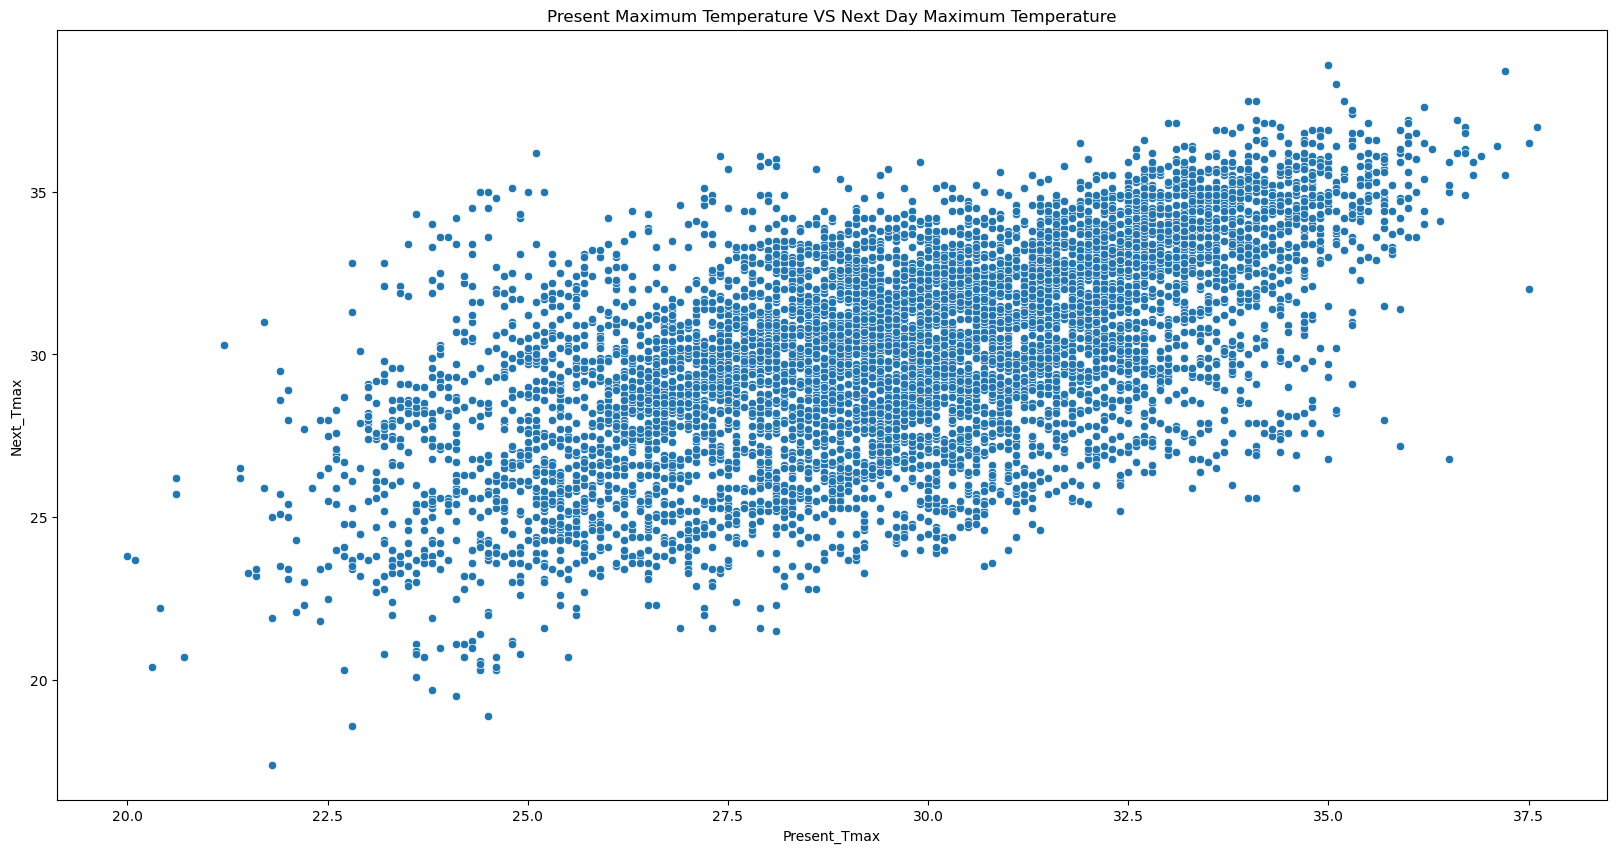

In [26]:
# Scatterplot Display Distribution Of Data Across Present Maximum Temperature VS Next day Maximum Temperature.
plt.figure(figsize=(20,10))
plt.title('Present Maximum Temperature VS Next Day Maximum Temperature')
sns.scatterplot(x= df['Present_Tmax'], y = df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

- <b> Here we can see when Present_Tmax is increasing Nex_Tmax is also getting higher.</b>

Text(0, 0.5, 'Next_Tmax')

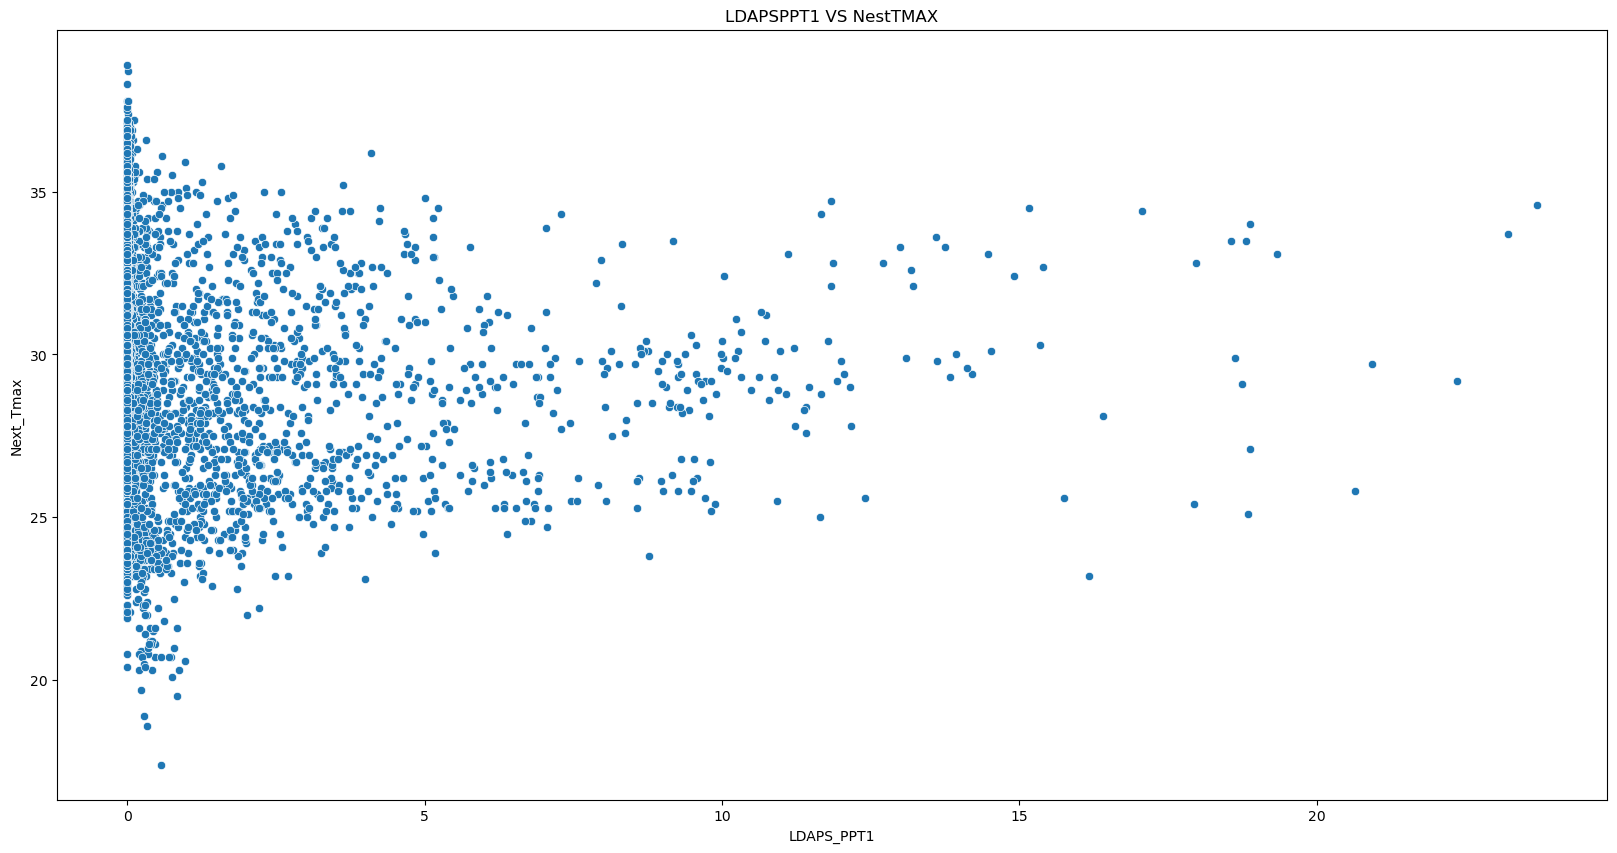

In [27]:
plt.figure(figsize=(20,10))
plt.title('LDAPSPPT1 VS NestTMAX')
sns.scatterplot(x= df['LDAPS_PPT1'], y = df['Next_Tmax'])
plt.xlabel('LDAPS_PPT1')
plt.ylabel('Next_Tmax')

Text(0, 0.5, 'Next_Tmax')

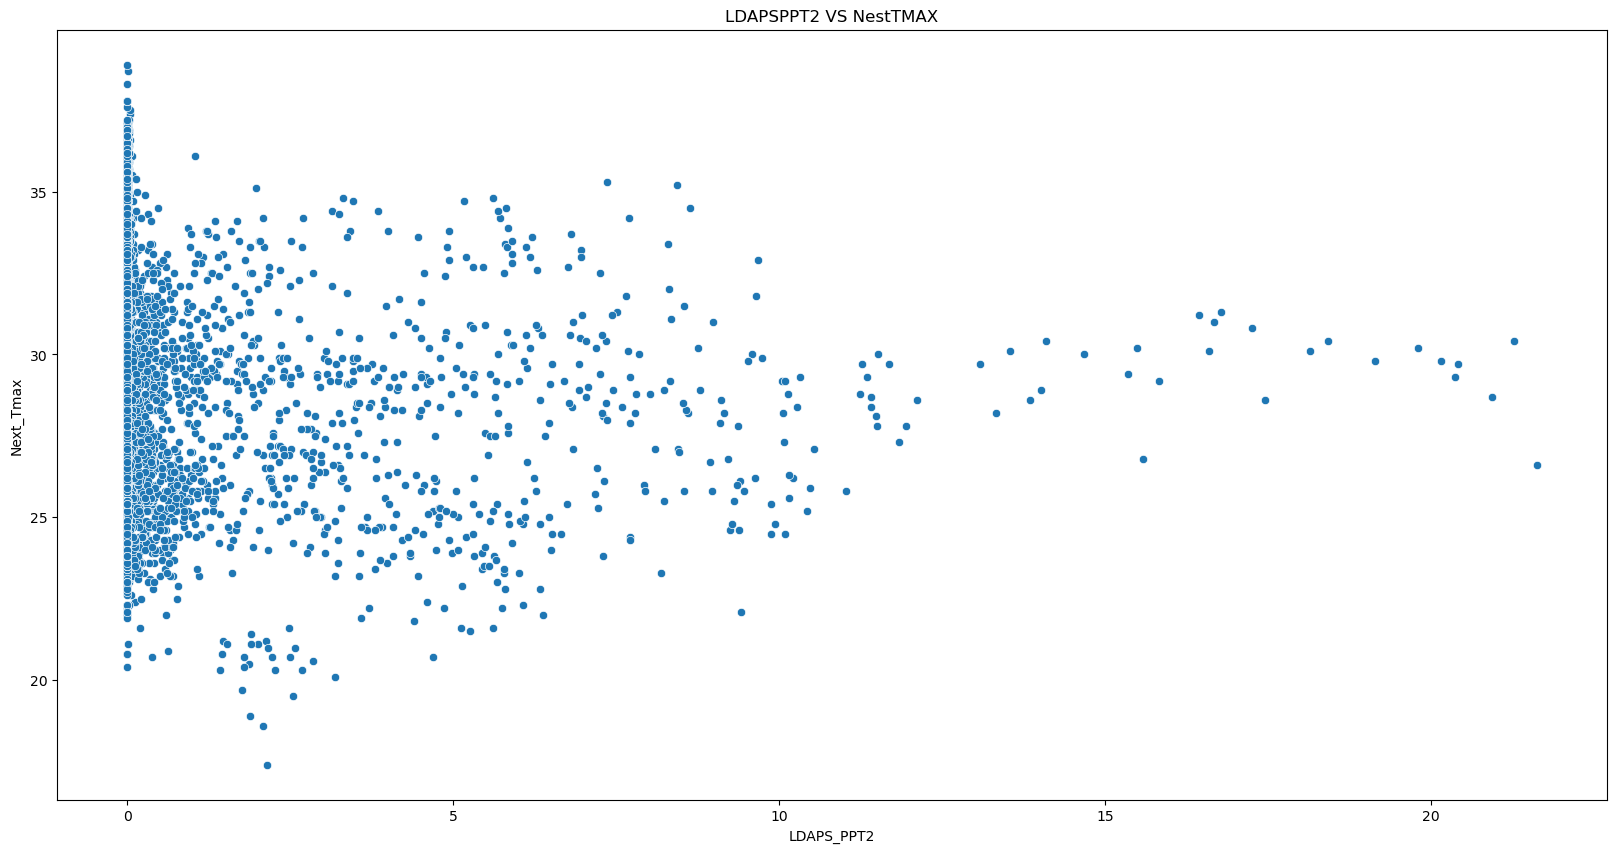

In [28]:
plt.figure(figsize=(20,10))
plt.title('LDAPSPPT2 VS NestTMAX')
sns.scatterplot(x= df['LDAPS_PPT2'], y = df['Next_Tmax'])
plt.xlabel('LDAPS_PPT2')
plt.ylabel('Next_Tmax')

Text(0, 0.5, 'Next_Tmax')

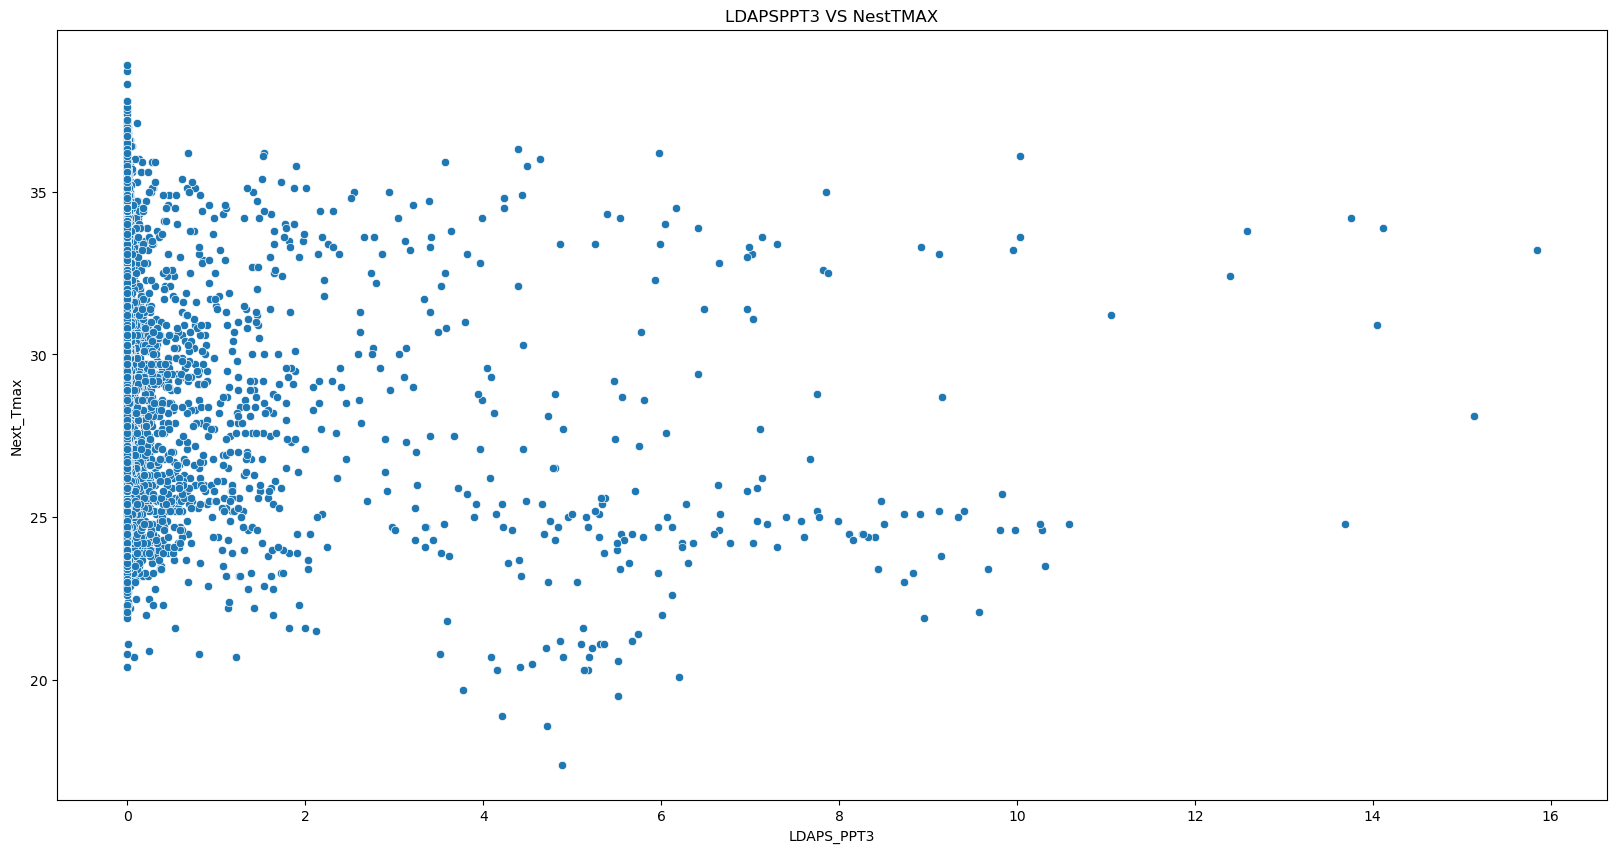

In [29]:
plt.figure(figsize=(20,10))
plt.title('LDAPSPPT3 VS NestTMAX')
sns.scatterplot(x= df['LDAPS_PPT3'], y = df['Next_Tmax'])
plt.xlabel('LDAPS_PPT3')
plt.ylabel('Next_Tmax')

Text(0, 0.5, 'Next_Tmax')

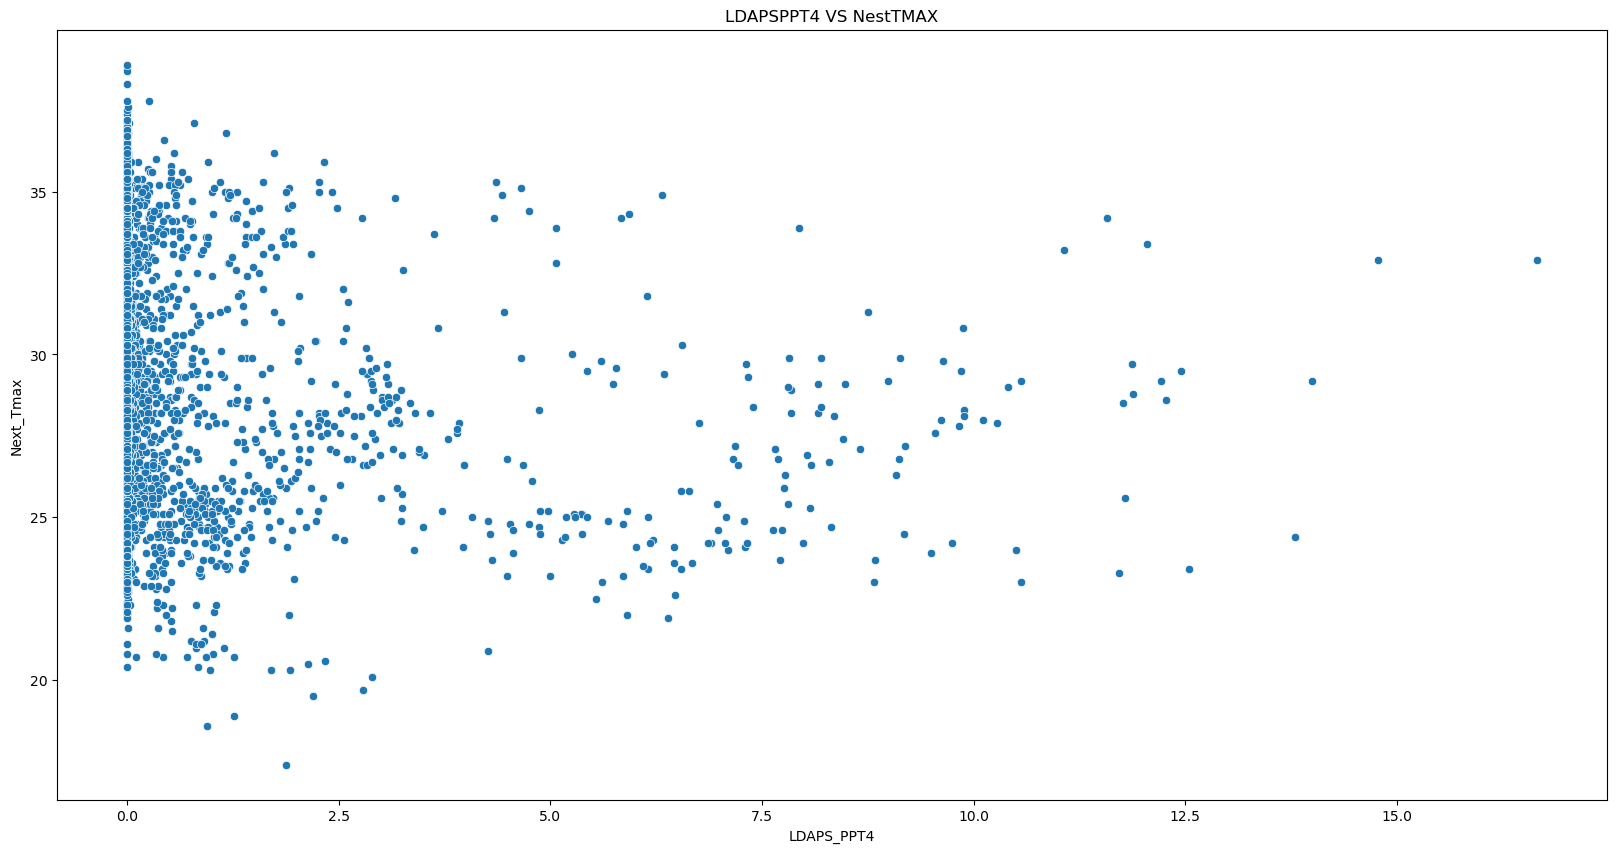

In [30]:
plt.figure(figsize=(20,10))
plt.title('LDAPSPPT4 VS NestTMAX')
sns.scatterplot(x= df['LDAPS_PPT4'], y = df['Next_Tmax'])
plt.xlabel('LDAPS_PPT4')
plt.ylabel('Next_Tmax')

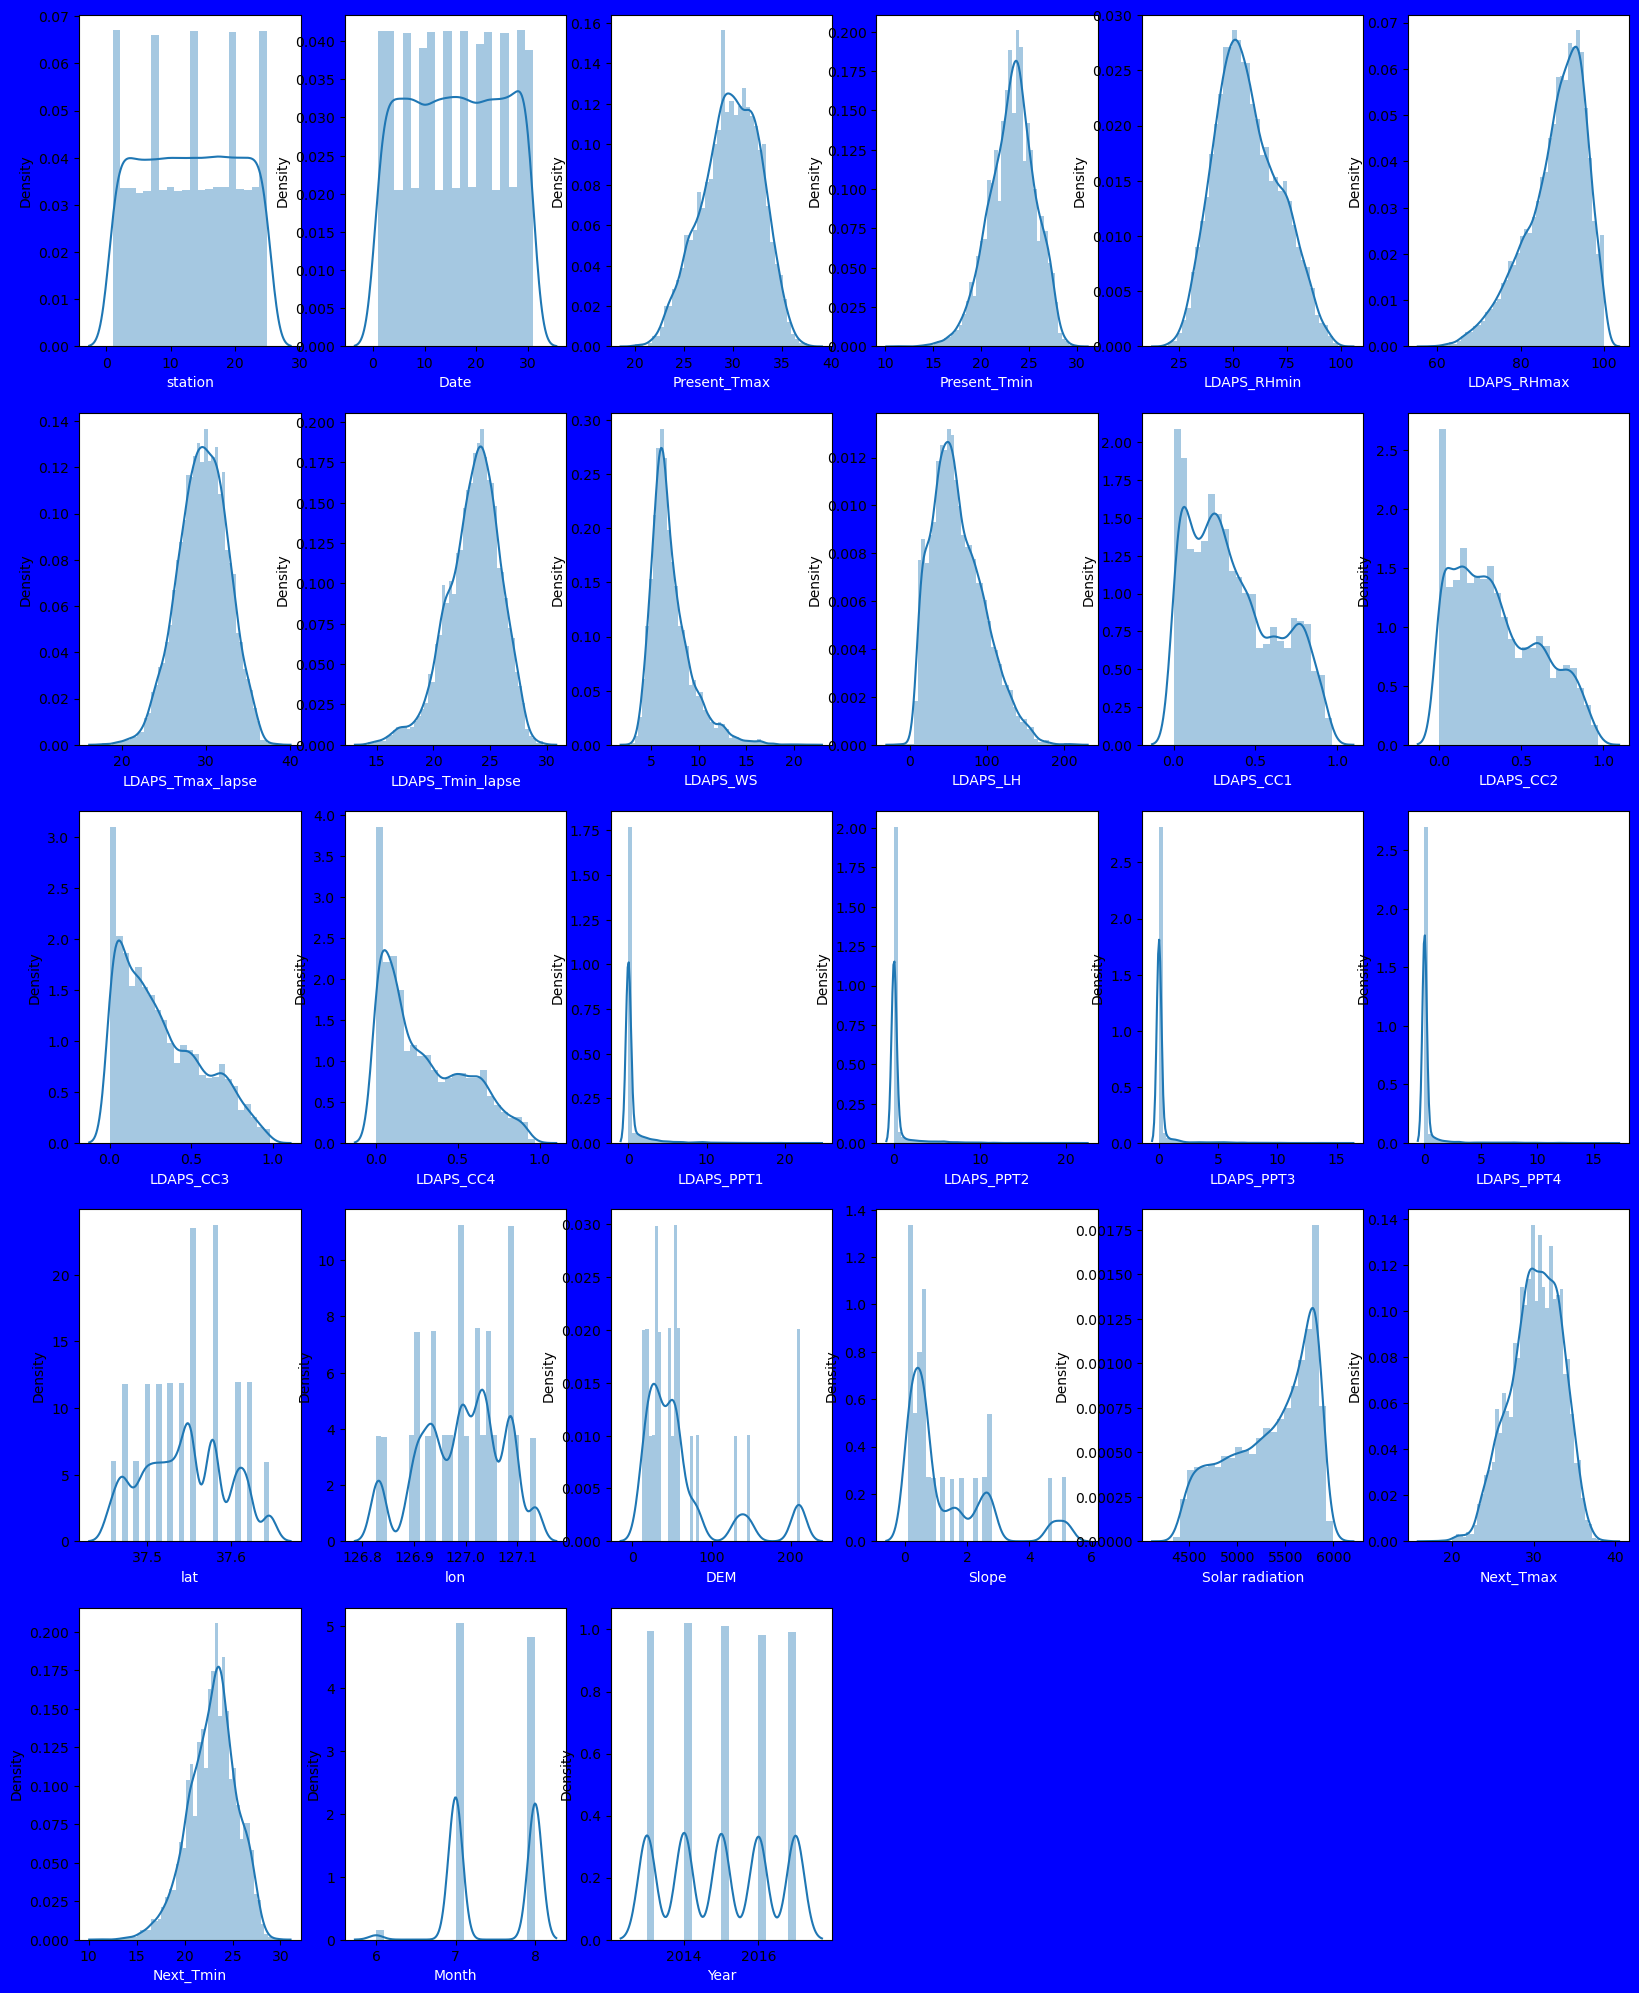

In [31]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns):
        axs = plt.subplot(5,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   int32  
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64
 17  

In [33]:
from scipy.stats import zscore
z_score = zscore(df[["Present_Tmin","LDAPS_RHmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4","Next_Tmax","Next_Tmin"]])
abs_z_score = np.abs(z_score)
filtering = (abs_z_score<3).all(axis = 1)
df =df[filtering]
df.describe()

station         Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
count  6766.000000  6766.000000   6766.000000   6766.000000  6766.000000   
mean     13.036358    15.858853     29.922199     23.278333    55.511563   
std       7.207505     8.891464      2.874293      2.308972    13.855658   
min       1.000000     1.000000     20.400000     16.100000    19.794666   
25%       7.000000     8.000000     28.000000     21.700000    45.552886   
50%      13.000000    16.000000     30.100000     23.400000    54.082066   
75%      19.000000    24.000000     32.100000     24.900000    65.055363   
max      25.000000    31.000000     37.600000     29.900000    96.169815   

       LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS  \
count  6766.000000       6766.000000       6766.000000  6766.000000   
mean     88.063435         29.898535         23.649491     6.860847   
std       6.981807          2.752526          2.231741     1.846295   
min      66.775764         21.195428         16.558304     2.882580   
25%      83.776079         28.004900         22.198049     5.617281   
50%      89.278683         29.940831         23.864510     6.444957   
75%      93.454086         31.849889         25.211643     7.744322   
max      99.999008         38.140534         29.619342    13.589191   

          LDAPS_LH  ...   LDAPS_PPT4          lat          lon          DEM  \
count  6766.000000  ...  6766.000000  6766.000000  6766.000000  6766.000000   
mean     62.341916  ...     0.086213    37.544196   126.990756    61.020530   
std      34.093864  ...     0.363109     0.050052     0.079715    53.524619   
min      -8.569043  ...     0.000000    37.456200   126.826000    12.370000   
25%      36.453529  ...     0.000000    37.510200   126.937000    28.700000   
50%      56.827280  ...     0.000000    37.550700   126.995000    45.716000   
75%      84.792300  ...     0.000000    37.577600   127.042000    59.832400   
max     213.414006  ...     3.789353    37.645000   127.135000   212.335000   

             Slope  Solar radiation    Next_Tmax    Next_Tmin        Month  \
count  6766.000000      6766.000000  6766.000000  6766.000000  6766.000000   
mean      1.238334      5343.910289    30.535013    23.062681     7.473101   
std       1.351596       420.966384     2.926152     2.362014     0.525563   
min       0.098500      4371.684570    21.100000    15.500000     6.000000   
25%       0.271300      5018.997559    28.600000    21.500000     7.000000   
50%       0.618000      5434.702148    30.700000    23.200000     7.000000   
75%       1.767800      5719.606934    32.700000    24.700000     8.000000   
max       5.178200      5992.895996    38.900000    29.800000     8.000000   

              Year  
count  6766.000000  
mean   2014.985664  
std       1.395569  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

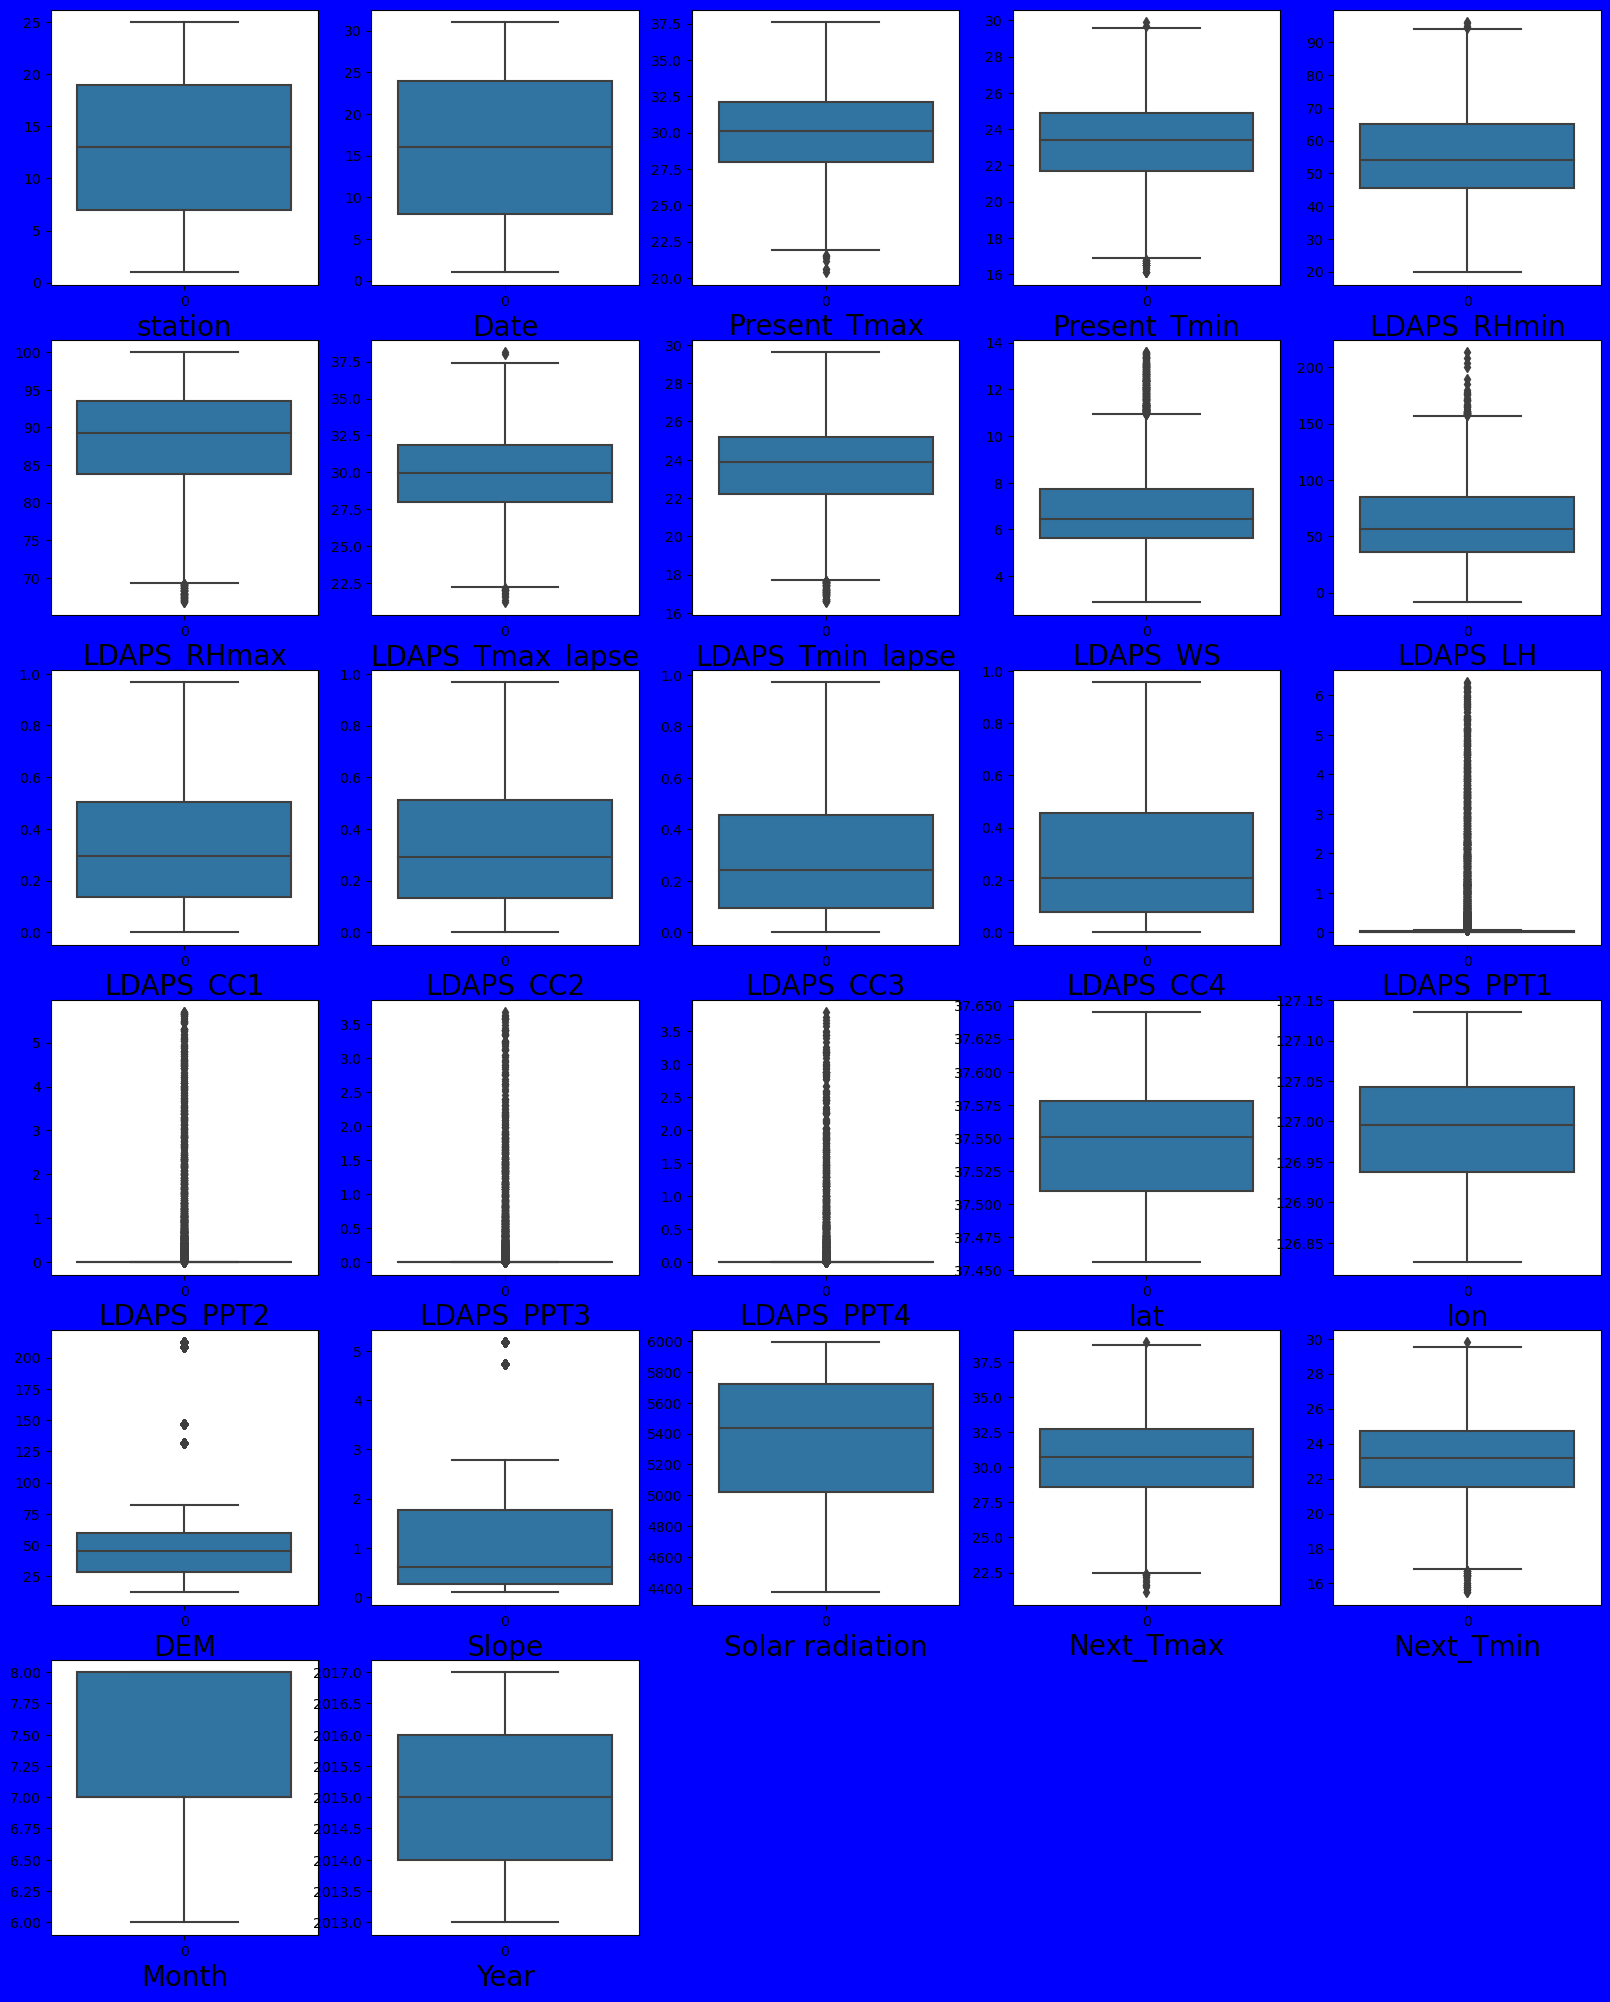

In [34]:
plt.figure(figsize = (20,25),facecolor = "blue")
plotnumber = 1
for column in df.columns:
    if plotnumber<= len(df.columns):
        axs = plt.subplot(6,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

In [35]:
df.skew()

station             0.001780
Date                0.001553
Present_Tmax       -0.281725
Present_Tmin       -0.221440
LDAPS_RHmin         0.311498
LDAPS_RHmax        -0.686374
LDAPS_Tmax_lapse   -0.112287
LDAPS_Tmin_lapse   -0.381723
LDAPS_WS            1.083439
LDAPS_LH            0.644745
LDAPS_CC1           0.595322
LDAPS_CC2           0.509866
LDAPS_CC3           0.704902
LDAPS_CC4           0.711119
LDAPS_PPT1          3.729464
LDAPS_PPT2          4.855080
LDAPS_PPT3          5.528418
LDAPS_PPT4          5.933244
lat                 0.102181
lon                -0.277474
DEM                 1.764719
Slope               1.590452
Solar radiation    -0.522156
Next_Tmax          -0.269742
Next_Tmin          -0.230843
Month              -0.170686
Year                0.025552
dtype: float64

In [36]:
#Using Boxcox Method  for remove Skewness
from scipy.stats import boxcox
for i in ["Present_Tmin","LDAPS_RHmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4","Next_Tmax","Next_Tmin"]:
    if df.dtypes[i] != 'object':
        trnsfrm_data, _ = boxcox(df[i]+1)
        df[i] =trnsfrm_data    

In [37]:
#Using Boxcox Method  for remove Skewness
from scipy.stats import boxcox
for i in ["LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]:
    if df.dtypes[i] != 'object':
        trnsfrm_data, _ = boxcox(df[i]+1)
        df[i] =trnsfrm_data    

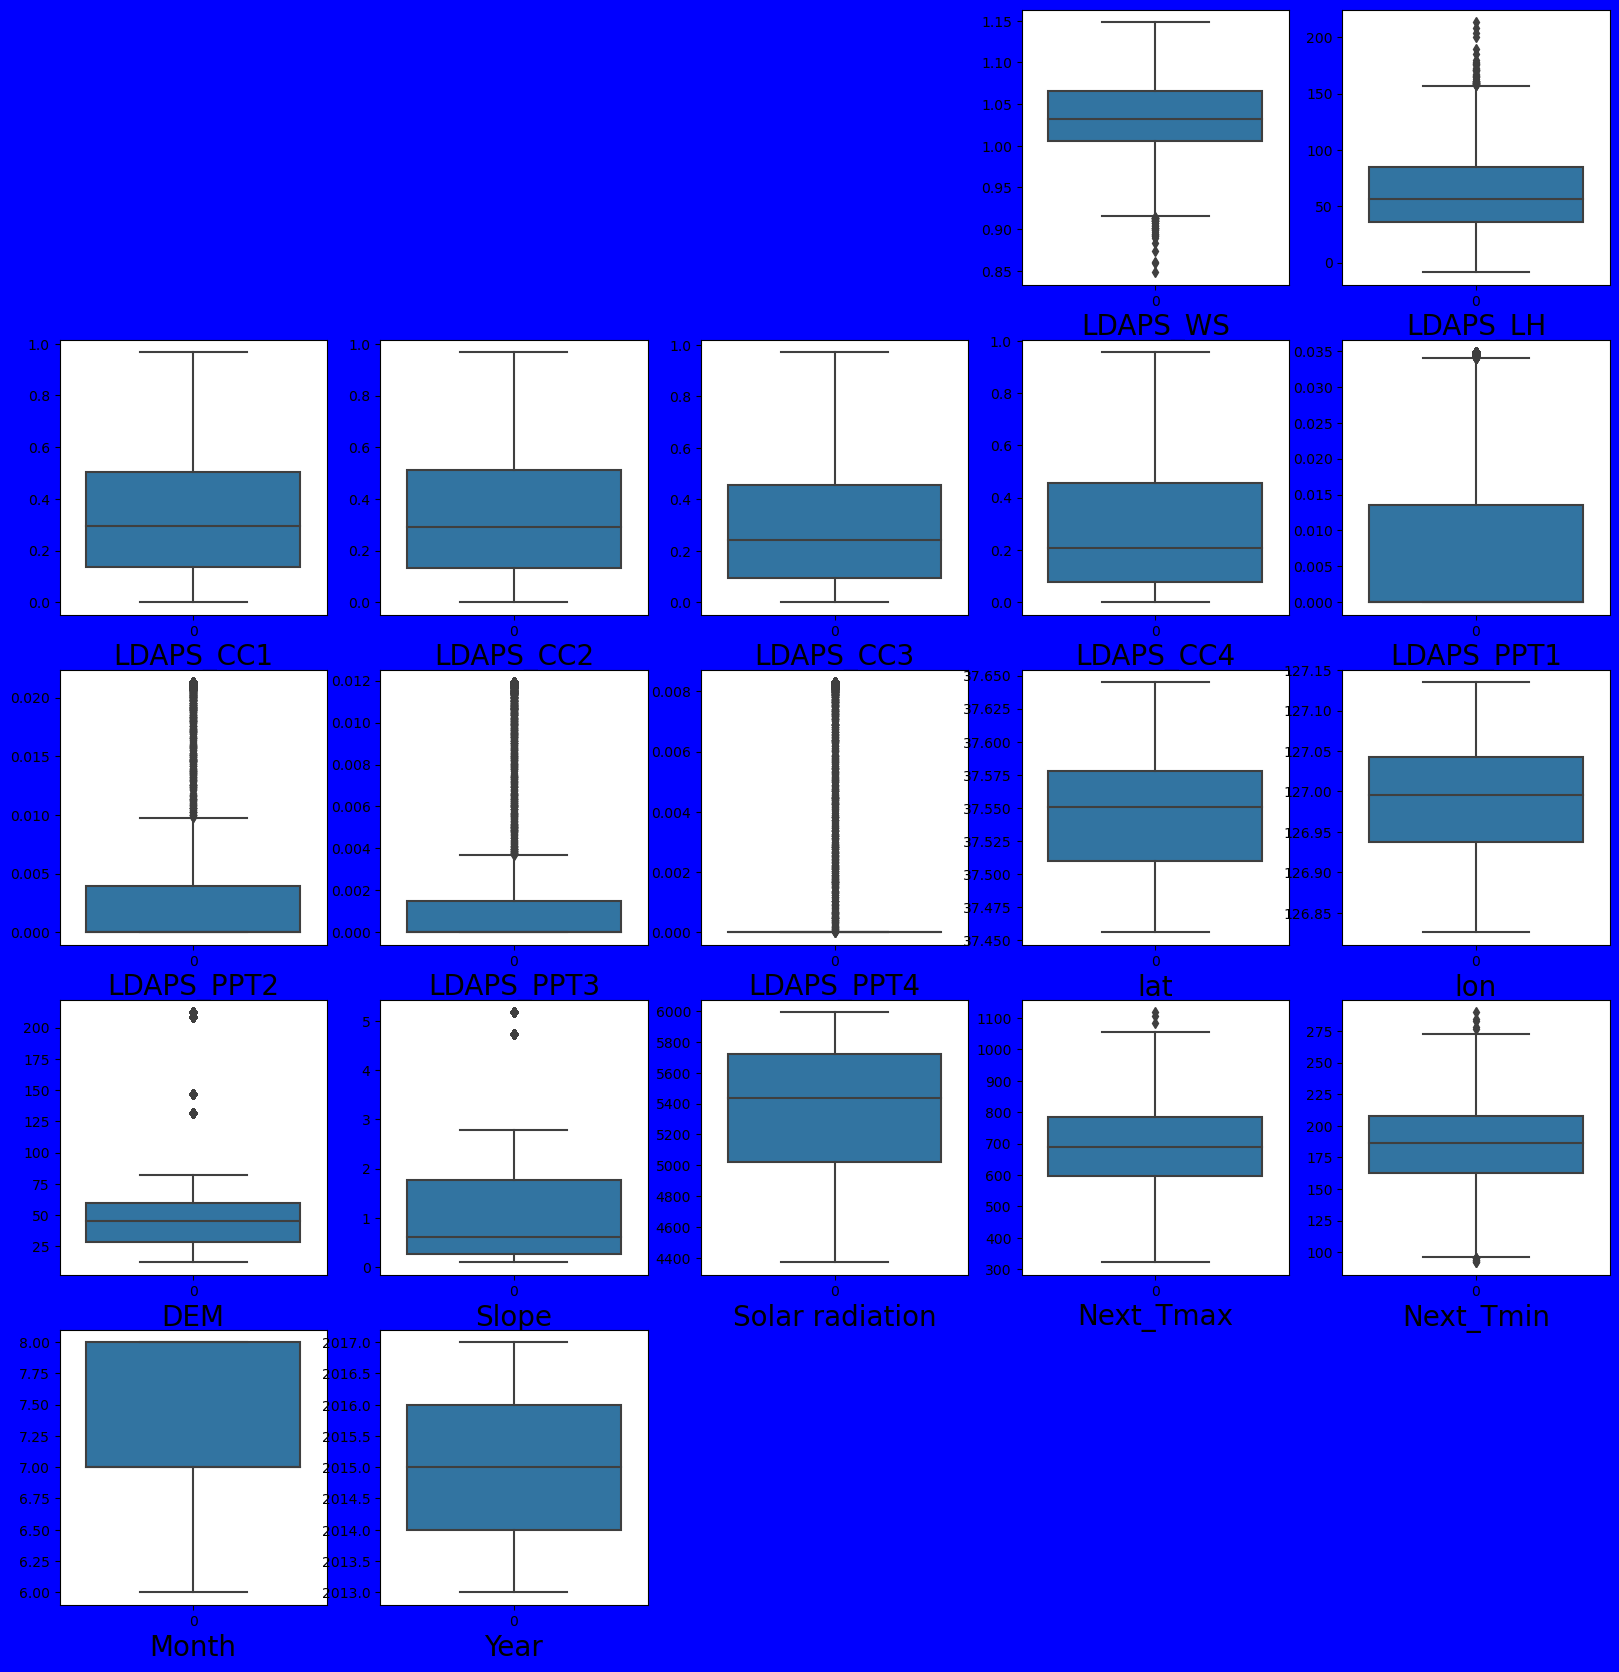

In [38]:
plt.figure(figsize = (20,25),facecolor = "blue")
plotnumber = 1
for column in df.columns:
    if plotnumber>= len(column):
        axs = plt.subplot(6,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

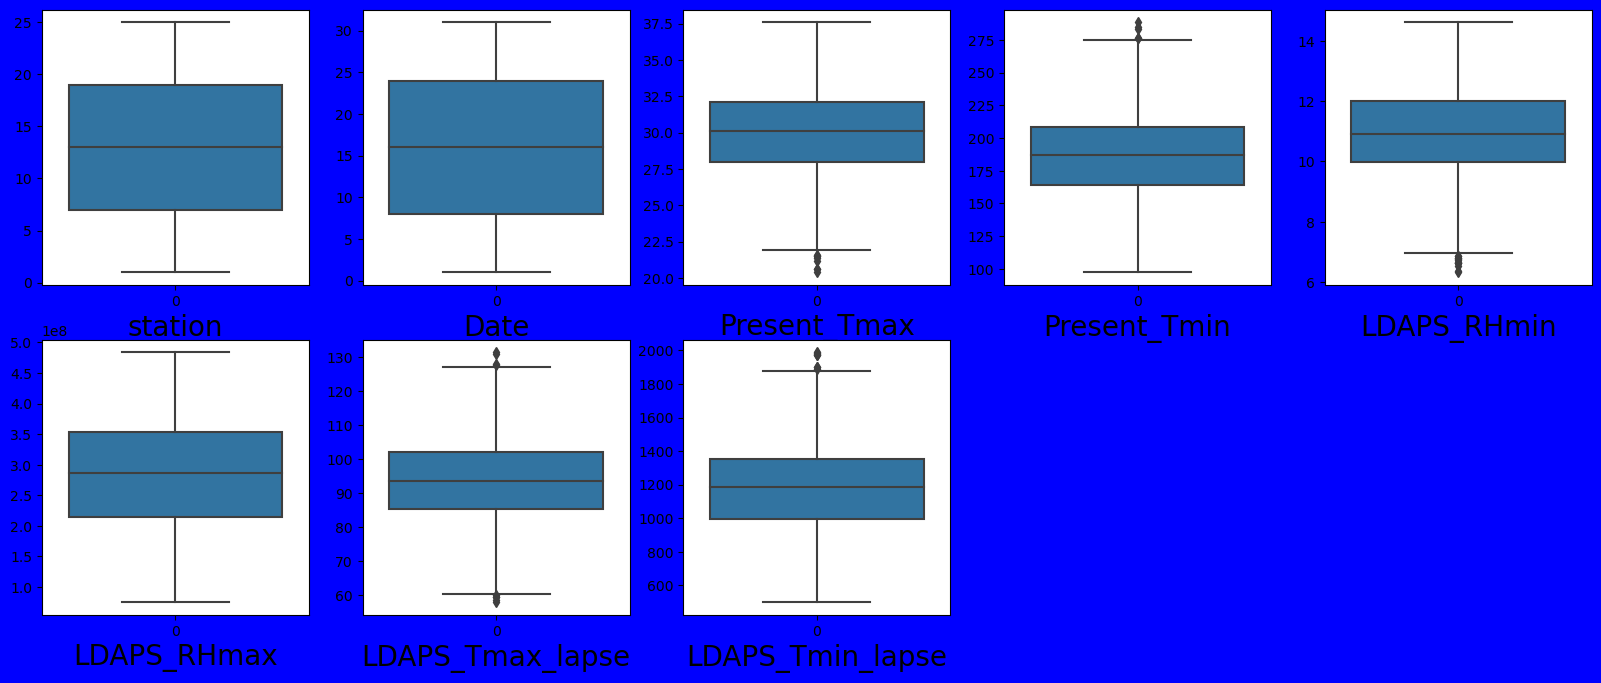

In [39]:
plt.figure(figsize = (20,25),facecolor = "blue")
plotnumber = 1
for column in df.columns:
    if plotnumber<= len(column):
        axs = plt.subplot(6,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

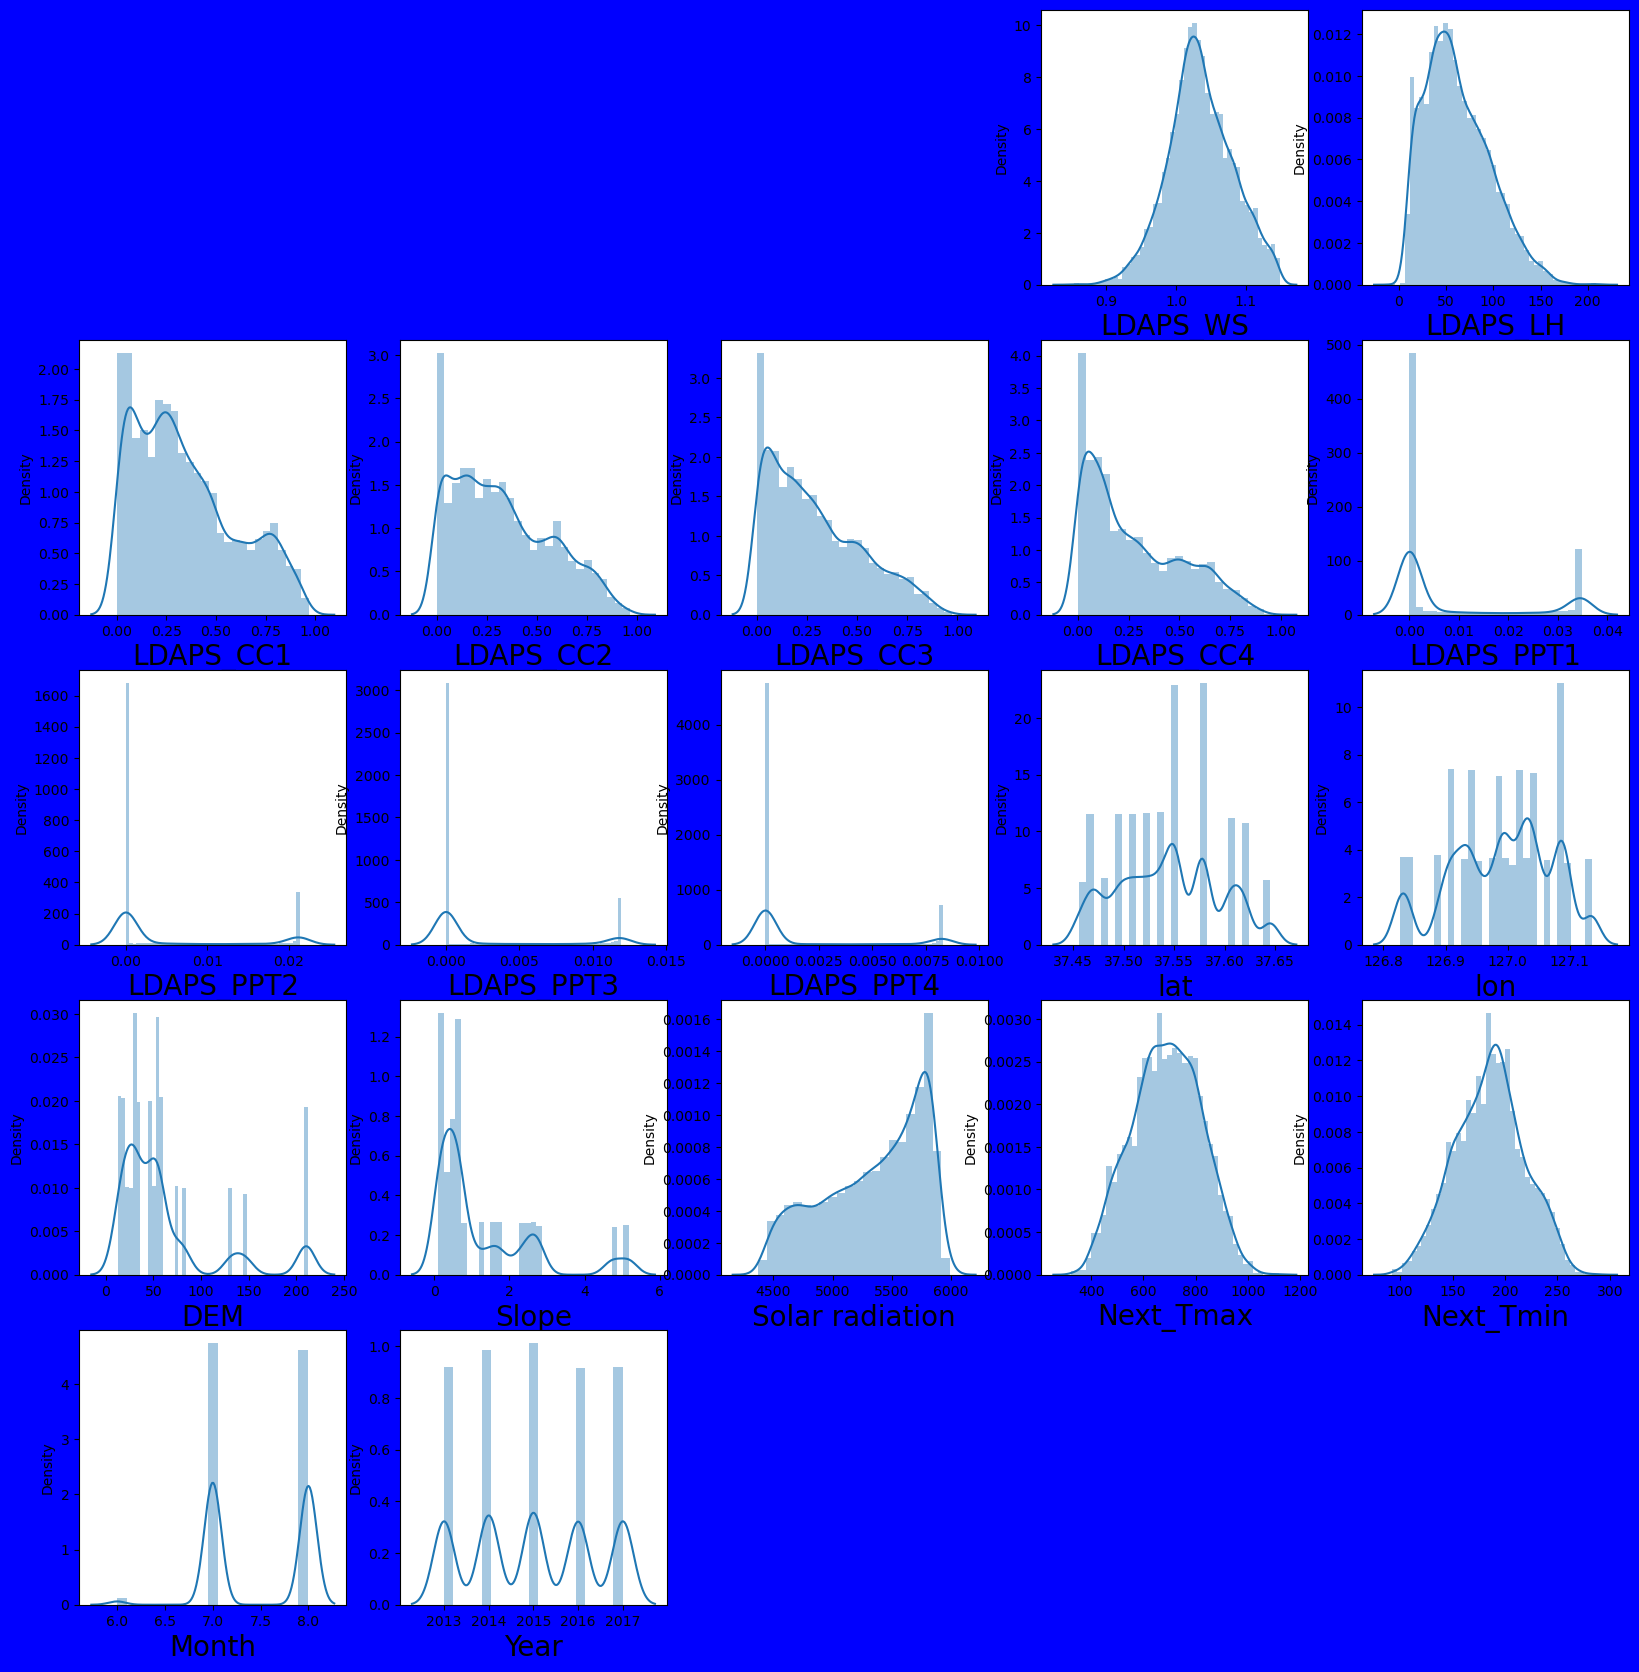

In [40]:
plt.figure(figsize = (20,25),facecolor = "blue")
plotnumber = 1
for column in df.columns:
    if plotnumber>= len(column):
        axs = plt.subplot(6,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

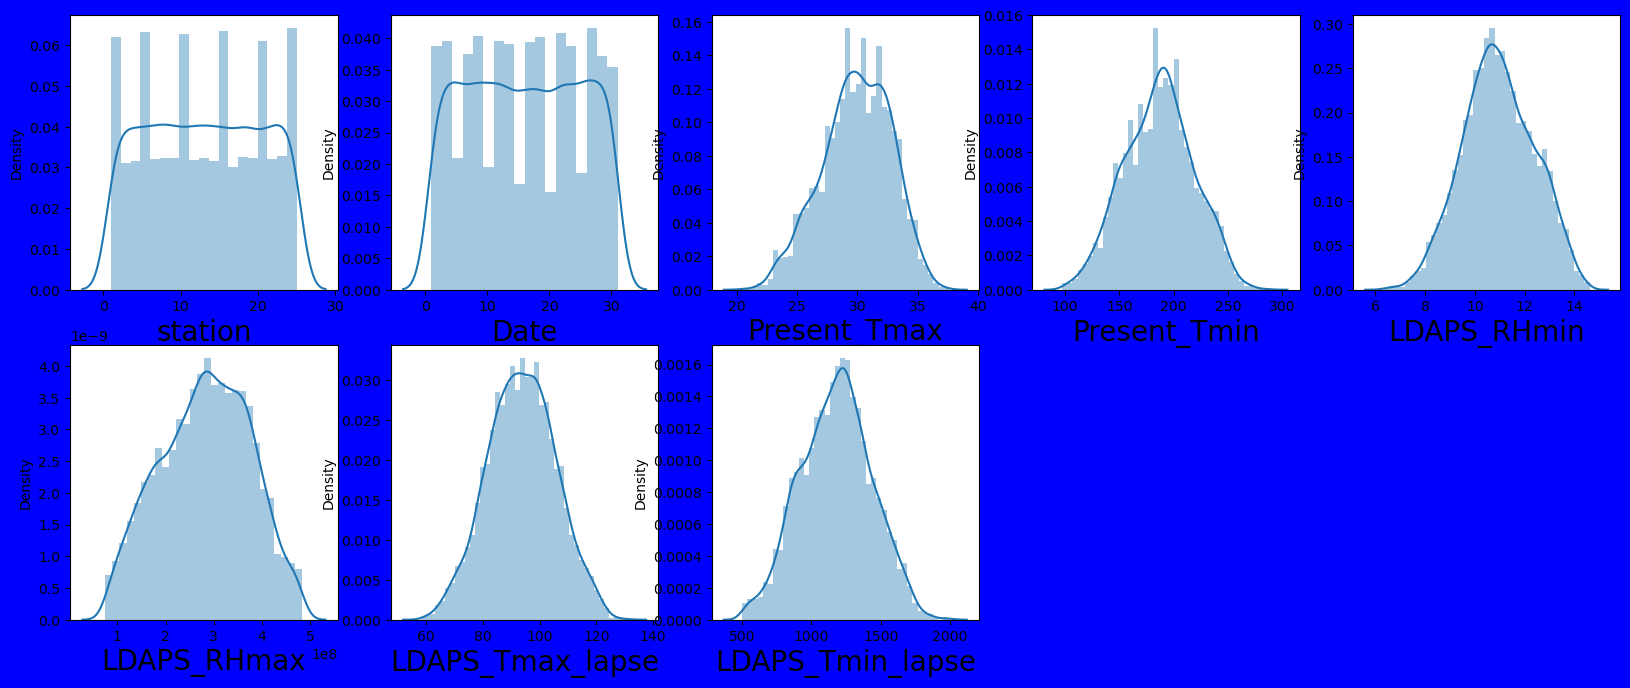

In [41]:
plt.figure(figsize = (20,25),facecolor = "blue")
plotnumber = 1
for column in df.columns:
    if plotnumber<= len(column):
        axs = plt.subplot(6,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

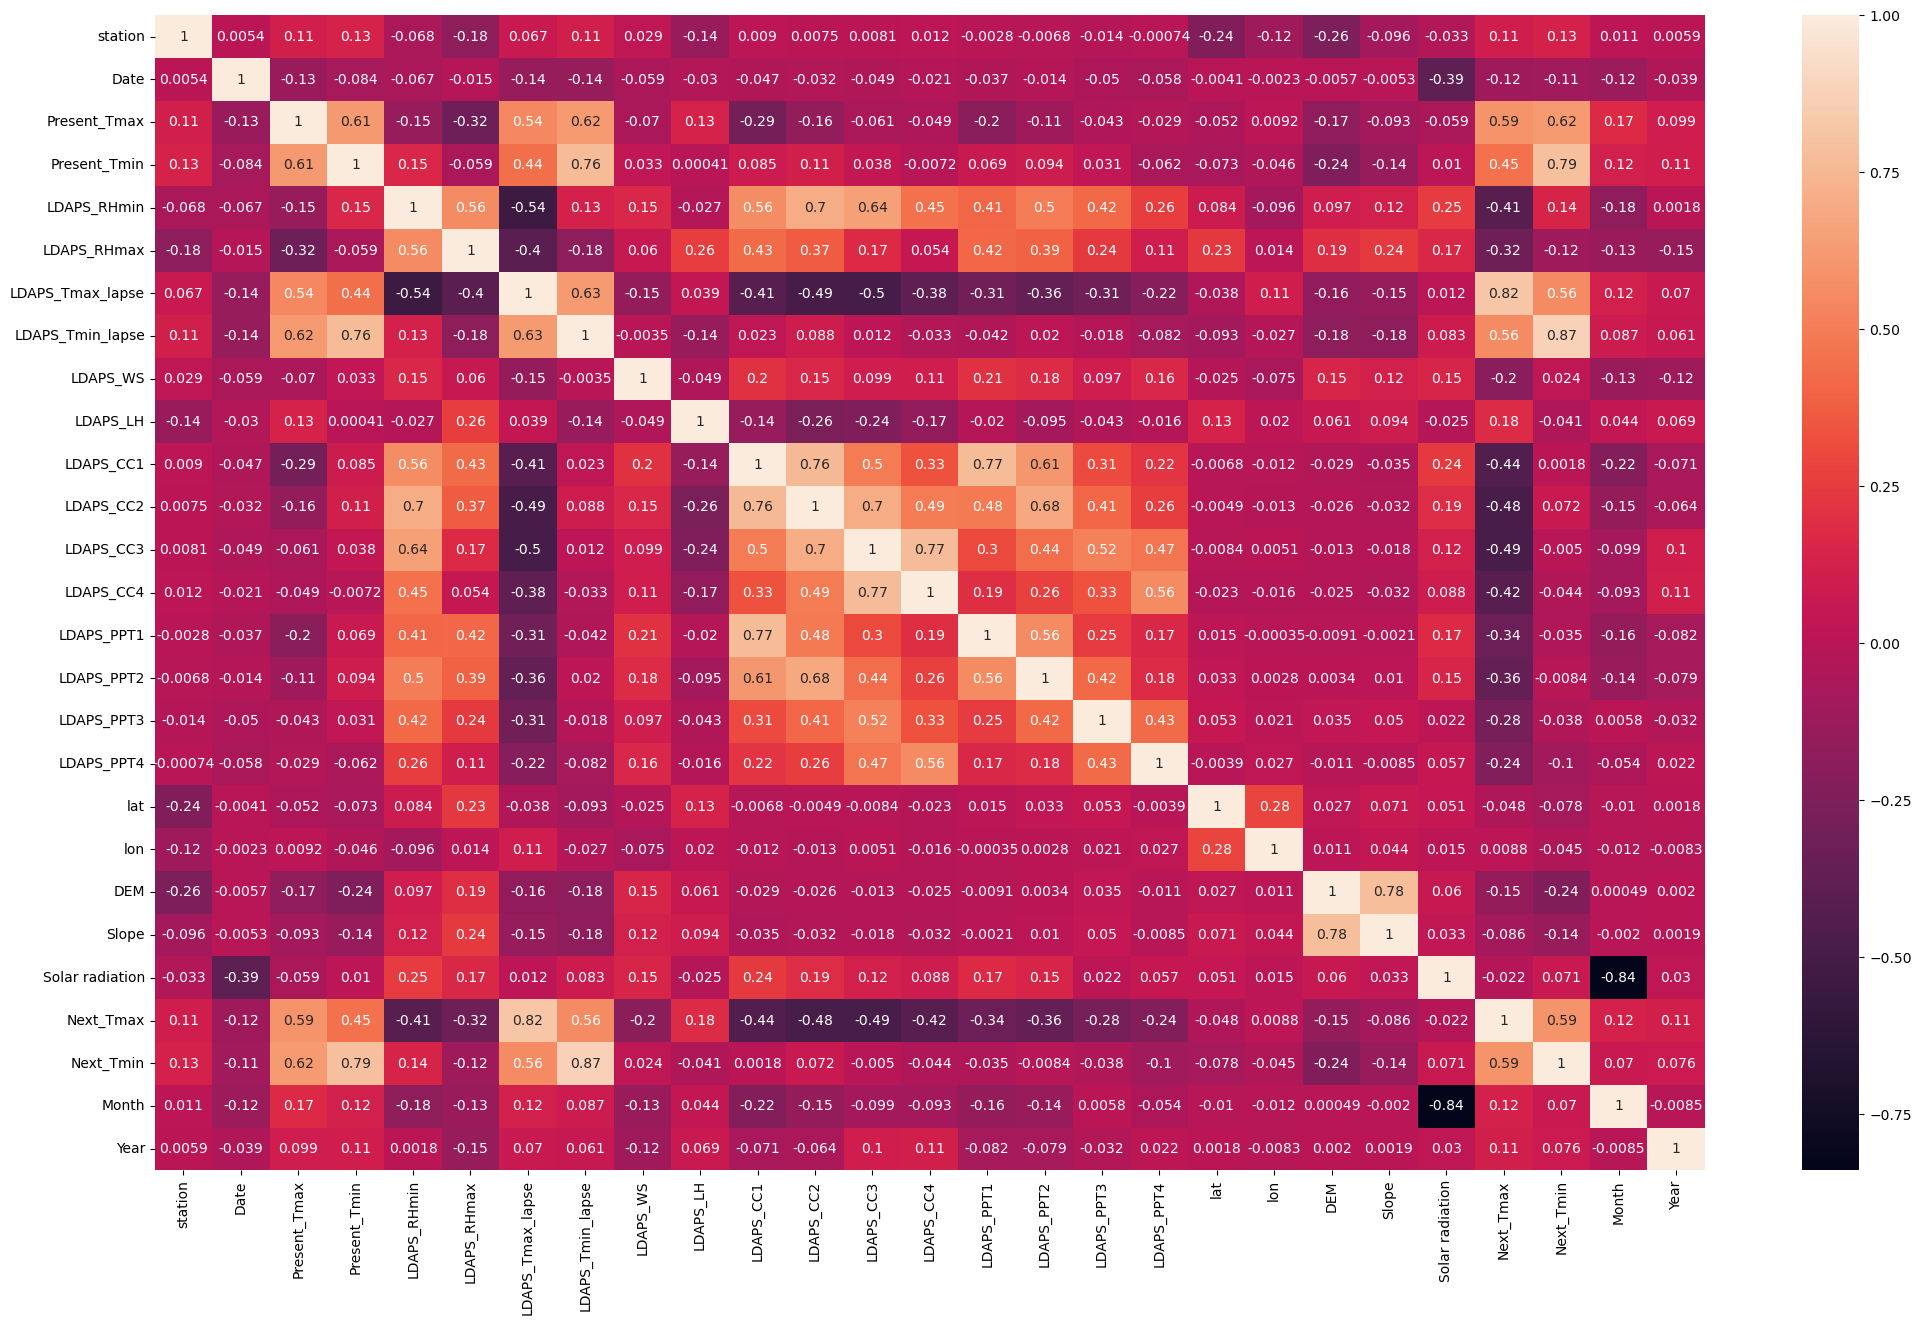

In [42]:
#Checking relationship Between Feature To Outcom And Feature To Feature
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,annot = True , annot_kws ={"size": 10})
plt.show()

### Model Building For Next_Tmax

In [43]:
#For For Next Tmax
X  = df.drop(columns = "Next_Tmax").copy()
y = df["Next_Tmax"].copy()

In [44]:
#Standardizing Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns =X.columns)

In [45]:
#Checking Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({"Features":X.columns,"vif":[variance_inflation_factor(X,i) for i in range(X.shape[1])]})
vif

Features        vif
0            station   1.236091
1               Date  10.054312
2       Present_Tmax   2.896219
3       Present_Tmin   3.447744
4        LDAPS_RHmin   5.810961
5        LDAPS_RHmax   2.500937
6   LDAPS_Tmax_lapse   6.890862
7   LDAPS_Tmin_lapse   8.775210
8           LDAPS_WS   1.212083
9           LDAPS_LH   1.557604
10         LDAPS_CC1   5.368083
11         LDAPS_CC2   5.564430
12         LDAPS_CC3   5.095400
13         LDAPS_CC4   3.075395
14        LDAPS_PPT1   2.984832
15        LDAPS_PPT2   2.387987
16        LDAPS_PPT3   1.706693
17        LDAPS_PPT4   1.772459
18               lat   1.315079
19               lon   1.174607
20               DEM   3.908550
21             Slope   3.184256
22   Solar radiation  38.494329
23         Next_Tmin   5.749647
24             Month  32.021198
25              Year   1.144016

In [46]:
X = X.drop(columns =['Month'])

In [47]:
#Checking Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({"Features":X.columns,"vif":[variance_inflation_factor(X,i) for i in range(X.shape[1])]})
vif

Features       vif
0            station  1.231345
1               Date  1.253970
2       Present_Tmax  2.844058
3       Present_Tmin  3.373320
4        LDAPS_RHmin  5.682348
5        LDAPS_RHmax  2.494884
6   LDAPS_Tmax_lapse  6.658117
7   LDAPS_Tmin_lapse  8.769915
8           LDAPS_WS  1.204900
9           LDAPS_LH  1.557381
10         LDAPS_CC1  5.362112
11         LDAPS_CC2  5.553919
12         LDAPS_CC3  5.091057
13         LDAPS_CC4  3.074637
14        LDAPS_PPT1  2.983986
15        LDAPS_PPT2  2.386467
16        LDAPS_PPT3  1.704614
17        LDAPS_PPT4  1.767005
18               lat  1.241555
19               lon  1.172581
20               DEM  3.300258
21             Slope  3.051609
22   Solar radiation  1.424724
23         Next_Tmin  5.707230
24              Year  1.142119

In [48]:
#Importing Necessory Liabraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [49]:
#Finding The Best Random State
max_accuracy = 0
best_rm = 0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 30,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_rm = i
print("Maximum R Square Score :-",max_accuracy,"in This Random State",best_rm)


Maximum R Square Score :- 0.9459615142738771 in This Random State 1047


In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 30,random_state = best_rm)

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred =lr.predict(x_test)
train_pred =lr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,lr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,lr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,lr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,lr_pred)*100))

Training Data- R Square Score 78.54230994819116
R Square Score:- 94.59615142738771
Mean Absolute Error:- 3040.2092094635254
Mean Squared Error:- 156306.90329821853
Root Mean Squared Error:- 395.3566785805174


In [53]:
score = cross_val_score(lr,x_train,y_train,cv = 5, scoring = "r2")
print(score)
print(score.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,lr_pred) - score.mean()))

[0.77208735 0.78975182 0.78869297 0.76934821 0.79400716]
78.27775025447443
Difference Between R Square Score And Cross Validation Score Is:- 0.16318401172913277


In [54]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn = KNN()
knn.fit(x_train,y_train)
knn_pred =knn.predict(x_test)
train_pred =knn.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,knn_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,knn_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,knn_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,knn_pred)*100))


Training Data- R Square Score 92.76175068867497
R Square Score:- 95.22146022114273
Mean Absolute Error:- 2887.5281170874255
Mean Squared Error:- 138219.77893793234
Root Mean Squared Error:- 371.7792072425949


In [55]:
score1 = cross_val_score(knn,x_train,y_train,cv = 5, scoring = "r2")
print(score1)
print(score1.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,knn_pred) - score1.mean()))

[0.88020623 0.88611506 0.88307478 0.87597015 0.87471297]
88.00158360960559
Difference Between R Square Score And Cross Validation Score Is:- 0.07219876611537146


In [56]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred =dtr.predict(x_test)
train_pred =dtr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,dtr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,dtr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,dtr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,dtr_pred)*100))

Training Data- R Square Score 100.0
R Square Score:- 92.97182134861146
Mean Absolute Error:- 3139.4019047854263
Mean Squared Error:- 203290.82617023407
Root Mean Squared Error:- 450.8778395200124


In [57]:
score2 = cross_val_score(dtr,x_train,y_train,cv = 5, scoring = "r2")
print(score2)
print(score2.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,dtr_pred) - score2.mean()))

[0.77919356 0.80262892 0.74792807 0.7730976  0.75511076]
77.15917805738802
Difference Between R Square Score And Cross Validation Score Is:- 0.15812643291223438


In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred =rfr.predict(x_test)
train_pred =rfr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,rfr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,rfr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,rfr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,rfr_pred)*100))

Training Data- R Square Score 98.70495452601251
R Square Score:- 97.29474206778593
Mean Absolute Error:- 2386.586602616319
Mean Squared Error:- 78249.87771685672
Root Mean Squared Error:- 279.73179604195286


In [59]:
score3 = cross_val_score(rfr,x_train,y_train,cv = 5, scoring = "r2")
print(score3)
print(score3.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,rfr_pred) - score3.mean()))

[0.90320262 0.90589577 0.89745729 0.89525036 0.89894671]
90.01505477654123
Difference Between R Square Score And Cross Validation Score Is:- 0.07279687291244696


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred =gbr.predict(x_test)
train_pred =gbr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,gbr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,gbr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,gbr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,gbr_pred)*100))

Training Data- R Square Score 87.9349677508372
R Square Score:- 96.63336632901834
Mean Absolute Error:- 2762.0950322787985
Mean Squared Error:- 97380.24235499102
Root Mean Squared Error:- 312.05807529206965


In [61]:
score4 = cross_val_score(gbr,x_train,y_train,cv = 5, scoring = "r2")
print(score4)
print(score4.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,gbr_pred) - score4.mean()))

[0.86125329 0.86457988 0.86070058 0.84918824 0.86454893]
86.00541848714825
Difference Between R Square Score And Cross Validation Score Is:- 0.106279478418701


In [62]:
from sklearn.linear_model import Lasso
lso = Lasso()
lso.fit(x_train,y_train)
lso_pred =lso.predict(x_test)
train_pred =lso.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,lso_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,lso_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,lso_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,lso_pred)*100))

Training Data- R Square Score 78.22641096795658
R Square Score:- 94.41435528738677
Mean Absolute Error:- 3148.8822056461036
Mean Squared Error:- 161565.37627230122
Root Mean Squared Error:- 401.9519576669595


In [63]:
score5 = cross_val_score(lso,x_train,y_train,cv = 5, scoring = "r2")
print(score5)
print(score5.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,lso_pred) - score5.mean()))

[0.77006956 0.78989919 0.78514179 0.76407024 0.79037599]
77.9911351872275
Difference Between R Square Score And Cross Validation Score Is:- 0.16423220100159264


In [64]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(x_train,y_train)
rdg_pred =rdg.predict(x_test)
train_pred =rdg.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,rdg_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,rdg_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,rdg_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,rdg_pred)*100))

Training Data- R Square Score 78.54230122346934
R Square Score:- 94.59482292027558
Mean Absolute Error:- 3041.2504566206903
Mean Squared Error:- 156345.33050984703
Root Mean Squared Error:- 395.40527375067603


In [65]:
score6 = cross_val_score(rdg,x_train,y_train,cv = 5, scoring = "r2")
print(score6)
print(score6.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,rdg_pred) - score6.mean()))

[0.77208668 0.78977907 0.78869277 0.76932705 0.79400978]
78.27790712743435
Difference Between R Square Score And Cross Validation Score Is:- 0.16316915792841236


In [66]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
svr_pred =svr.predict(x_test)
train_pred =svr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,svr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,svr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,svr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,svr_pred)*100))

Training Data- R Square Score 69.95401414965015
R Square Score:- 80.96235862903754
Mean Absolute Error:- 6158.140618060083
Mean Squared Error:- 550665.8317330856
Root Mean Squared Error:- 742.0686165935638


In [67]:
score7 = cross_val_score(svr,x_train,y_train,cv = 5, scoring = "r2")
print(score7)
print(score7.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,svr_pred) - score7.mean()))

[0.65616192 0.68540051 0.67320389 0.65842329 0.68395666]
67.14292557072815
Difference Between R Square Score And Cross Validation Score Is:- 0.13819433058309394


In [68]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred =etr.predict(x_test)
train_pred =etr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,etr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,etr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,etr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,etr_pred)*100))

Training Data- R Square Score 100.0
R Square Score:- 97.6170769599969
Mean Absolute Error:- 2057.6408067530374
Mean Squared Error:- 68926.30616420234
Root Mean Squared Error:- 262.53819943810527


In [69]:
score8 = cross_val_score(etr,x_train,y_train,cv = 5, scoring = "r2")
print(score8)
print(score8.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,etr_pred) - score8.mean()))

[0.92569887 0.93094599 0.92638181 0.91932137 0.92577299]
92.56242061182182
Difference Between R Square Score And Cross Validation Score Is:- 0.050546563481750684


In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid = {'criterion':['absolute_error','squared_error'],
            'n_estimators':[50,100],
             'max_depth':[None],
             'min_samples_split':[2,3],
             'min_samples_leaf':[2],
             'bootstrap':[True,False]}

In [72]:
grid_search = GridSearchCV(estimator = etr,param_grid =param_grid,scoring ='r2', cv =5)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
best_param = grid_search.best_params_

In [74]:
Next_Tmax_Model = ExtraTreesRegressor(criterion = 'squared_error',max_depth = 50,n_estimators = 300,min_samples_split=10,min_samples_leaf = 10)
Next_Tmax_Model.fit(x_train,y_train)
Tmax_pred = Next_Tmax_Model.predict(x_test)
R2_Score = r2_score(y_test,Tmax_pred)
print(R2_Score*100)


96.79343342073685


In [75]:
import joblib
joblib.dump(Next_Tmax_Model,"Temperature Forcast Next_Tmax.pkl")

['Temperature Forcast Next_Tmax.pkl']

In [76]:
#For For Next Tmax
X  = df.drop(columns = "Next_Tmin").copy()
y = df["Next_Tmin"].copy()

In [77]:
#Finding The Best Random State
max_accuracy = 0
best_rm = 0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 30,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_rm = i
print("Maximum R Square Score :-",max_accuracy,"in This Random State",best_rm)


Maximum R Square Score :- 0.9519266579083905 in This Random State 494


In [78]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 30,random_state = best_rm)

In [79]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred =lr.predict(x_test)
train_pred =lr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,lr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,lr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,lr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,lr_pred)*100))

Training Data- R Square Score 84.25256371434624
R Square Score:- 95.19266579083904
Mean Absolute Error:- 710.5113076400105
Mean Squared Error:- 7337.789909842079
Root Mean Squared Error:- 85.66090070646047


In [80]:
score = cross_val_score(lr,x_train,y_train,cv = 5, scoring = "r2")
print(score)
print(score.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,lr_pred) - score.mean()))

[0.85319223 0.83473026 0.83434014 0.84192502 0.8393027 ]
84.0698071519848
Difference Between R Square Score And Cross Validation Score Is:- 0.11122858638854238


In [81]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn = KNN()
knn.fit(x_train,y_train)
knn_pred =knn.predict(x_test)
train_pred =knn.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,knn_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,knn_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,knn_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,knn_pred)*100))


Training Data- R Square Score 21.437932979307238
R Square Score:- -33.22549245282447
Mean Absolute Error:- 3652.3354926694005
Mean Squared Error:- 203351.92681032675
Root Mean Squared Error:- 450.9455918515301


In [82]:
score1 = cross_val_score(knn,x_train,y_train,cv = 5, scoring = "r2")
print(score1)
print(score1.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,knn_pred) - score1.mean()))

[-0.15216218 -0.18614238 -0.20734256 -0.15093786 -0.19151124]
-17.761924514753765
Difference Between R Square Score And Cross Validation Score Is:- -0.15463567938070702


In [83]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred =dtr.predict(x_test)
train_pred =dtr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,dtr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,dtr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,dtr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,dtr_pred)*100))

Training Data- R Square Score 100.0
R Square Score:- 89.08533035927142
Mean Absolute Error:- 999.3751716431831
Mean Squared Error:- 16659.867875709067
Root Mean Squared Error:- 129.0731105835335


In [84]:
score2 = cross_val_score(dtr,x_train,y_train,cv = 5, scoring = "r2")
print(score2)
print(score2.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,dtr_pred) - score2.mean()))

[0.79396859 0.78812194 0.79681586 0.77546639 0.80458037]
79.17906298060159
Difference Between R Square Score And Cross Validation Score Is:- 0.09906267378669842


In [85]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred =rfr.predict(x_test)
train_pred =rfr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,rfr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,rfr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,rfr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,rfr_pred)*100))

Training Data- R Square Score 98.74203274713912
R Square Score:- 97.53384196226808
Mean Absolute Error:- 462.3314444241059
Mean Squared Error:- 3764.2794900468602
Root Mean Squared Error:- 61.35372433721412


In [86]:
score3 = cross_val_score(rfr,x_train,y_train,cv = 5, scoring = "r2")
print(score3)
print(score3.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,rfr_pred) - score3.mean()))

[0.91608032 0.90562791 0.89653453 0.91426253 0.90452576]
90.74062099859131
Difference Between R Square Score And Cross Validation Score Is:- 0.06793220963676783


In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred =gbr.predict(x_test)
train_pred =gbr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,gbr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,gbr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,gbr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,gbr_pred)*100))

Training Data- R Square Score 90.91849322650984
R Square Score:- 96.8103532273551
Mean Absolute Error:- 556.9144767388846
Mean Squared Error:- 4868.59387884313
Root Mean Squared Error:- 69.77530995160917


In [88]:
score4 = cross_val_score(gbr,x_train,y_train,cv = 5, scoring = "r2")
print(score4)
print(score4.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,gbr_pred) - score4.mean()))

[0.90233247 0.89155965 0.88480066 0.89429047 0.89185786]
89.2968222928771
Difference Between R Square Score And Cross Validation Score Is:- 0.07513530934477997


In [89]:
from sklearn.linear_model import Lasso
lso = Lasso()
lso.fit(x_train,y_train)
lso_pred =lso.predict(x_test)
train_pred =lso.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,lso_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,lso_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,lso_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,lso_pred)*100))

Training Data- R Square Score 82.77338499197569
R Square Score:- 94.2802156338703
Mean Absolute Error:- 732.9529184118715
Mean Squared Error:- 8730.530098839201
Root Mean Squared Error:- 93.43730571264992


In [90]:
score5 = cross_val_score(lso,x_train,y_train,cv = 5, scoring = "r2")
print(score5)
print(score5.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,lso_pred) - score5.mean()))

[0.84067845 0.81781819 0.81881532 0.82851962 0.82832831]
82.68319769863433
Difference Between R Square Score And Cross Validation Score Is:- 0.11597017935235965


In [91]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(x_train,y_train)
rdg_pred =rdg.predict(x_test)
train_pred =rdg.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,rdg_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,rdg_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,rdg_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,rdg_pred)*100))

Training Data- R Square Score 83.93248757095672
R Square Score:- 94.79936981893766
Mean Absolute Error:- 700.4413325445225
Mean Squared Error:- 7938.106652684726
Root Mean Squared Error:- 89.0960529579438


In [92]:
score6 = cross_val_score(rdg,x_train,y_train,cv = 5, scoring = "r2")
print(score6)
print(score6.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,rdg_pred) - score6.mean()))

[0.85126501 0.83159027 0.82961539 0.83936811 0.8357464 ]
83.75170370775841
Difference Between R Square Score And Cross Validation Score Is:- 0.11047666111179255


In [93]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
svr_pred =svr.predict(x_test)
train_pred =svr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,svr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,svr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,svr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,svr_pred)*100))

Training Data- R Square Score 1.8389207608245584
R Square Score:- 4.050183526178652
Mean Absolute Error:- 2934.284273614558
Mean Squared Error:- 146455.3044452653
Root Mean Squared Error:- 382.6947928117984


In [94]:
score7 = cross_val_score(svr,x_train,y_train,cv = 5, scoring = "r2")
print(score7)
print(score7.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,svr_pred) - score7.mean()))

[0.01336902 0.01441736 0.0097013  0.02557513 0.0216369 ]
1.6939943674652613
Difference Between R Square Score And Cross Validation Score Is:- 0.02356189158713391


In [95]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred =etr.predict(x_test)
train_pred =etr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,etr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,etr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,etr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,etr_pred)*100))

Training Data- R Square Score 100.0
R Square Score:- 97.75970276845527
Mean Absolute Error:- 467.36181012298255
Mean Squared Error:- 3419.531429570663
Root Mean Squared Error:- 58.47675973898232


In [96]:
score8 = cross_val_score(etr,x_train,y_train,cv = 5, scoring = "r2")
print(score8)
print(score8.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,etr_pred) - score8.mean()))

[0.92845262 0.91665072 0.91488567 0.92345162 0.91916089]
92.05203052285856
Difference Between R Square Score And Cross Validation Score Is:- 0.05707672245596718


In [100]:
param_grid = {'criterion':['absolute_error','squared_error'],
            'n_estimators':[50],
             'max_depth':[None],
             'min_samples_split':[1,2],
             'min_samples_leaf':[2,4],
             'bootstrap':[True,False]}

In [101]:
grid_search = GridSearchCV(estimator = etr,param_grid =param_grid,scoring ='r2', cv =5)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
best_param = grid_search.best_params_

In [103]:
Next_Tmin_Model = ExtraTreesRegressor(criterion = 'squared_error',max_depth = 50,n_estimators = 100,min_samples_split=2,min_samples_leaf = 4)
Next_Tmin_Model.fit(x_train,y_train)
Tmin_pred = Next_Tmin_Model.predict(x_test)
R2_Score = r2_score(y_test,Tmin_pred)
print(R2_Score*100)


97.4955081116082


In [104]:
import joblib
joblib.dump(Next_Tmin_Model,"Temperature Forcast Next_Tmin.pkl")

['Temperature Forcast Next_Tmin.pkl']

In [105]:

import joblib
joblib.dump(Next_Tmax_Model,"Temperature Forcast Next_Tmax.pkl")

['Temperature Forcast Next_Tmax.pkl']